In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


oly = pd.read_csv('/content/med_sort.csv')
df2 = pd.read_csv('/content/FullyMelted1.csv')
df3 = pd.read_csv('/content/FullyMelted1.csv')

df2 = df2.drop(columns=['Unnamed: 0.1','Unnamed: 0'])
df2['Year-Country'] = df2['Country'] + ',' + (df2['Year']).astype(str)
agg_functions = {'pred':'sum'}
ggdf = df2.groupby(['Year','Country']).aggregate(agg_functions)
ggdf = ggdf.reset_index()
df_grouped = ggdf.groupby('Country')
predictedMedals = []
predictedMedals = df_grouped['pred'].sum()
df1 = oly
df2 = ggdf
df = pd.DataFrame({'Pred': predictedMedals})
df = df.reset_index()
df3['PredSum'] = ['predsum'] * len(df3)
for index, row in df.iterrows():
    condition = (df3['Country'] == row['Country'])
    df3.loc[condition, 'PredSum'] = row['Pred']
df2 = df3.drop(columns=['Unnamed: 0.1','Unnamed: 0'])

df1 = pd.read_csv('/content/med_sort.csv')

df2 = df2.drop(columns = 'Unnamed: 0')
df1 = df1.rename(columns={'index': 'CountryName', 'Country_x': 'Country', 'Key_Column':'Year'})
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world.rename(columns = {'iso_a3':'Country', 'geometry':'Geometry'})

<ipython-input-419-27f34af0c60f>:10: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [ ]:
world

NameError: ignored

In [ ]:
df2['SubRegion'] = ['SubRegion'] * len(df2)
df2['MajorRegion'] = ['MajorRegion'] * len(df2)
df2['Name'] = ['Name'] * len(df2)
df2['Geometry'] = ['Geometry'] * len(df2)

country_to_subregion_mapping = df1.set_index('Country')['SubRegion'].to_dict()
country_to_majorregion_mapping = df1.set_index('Country')['MajorRegion'].to_dict()
country_to_name_mapping = df1.set_index('Country')['CountryName'].to_dict()
country_to_geometry_mapping = world.set_index('Country')['Geometry'].to_dict()

df2['SubRegion'] = df2['Country'].map(country_to_subregion_mapping).fillna(df2['SubRegion'])
df2['MajorRegion'] = df2['Country'].map(country_to_majorregion_mapping).fillna(df2['MajorRegion'])
df2['CountryName'] = df2['Country'].map(country_to_name_mapping).fillna(df2['Name'])
df2['Geometry'] = df2['Country'].map(country_to_geometry_mapping).fillna(df2['Geometry'])
df2 = df2.drop(columns = 'Name')

In [ ]:
bad_country = df2[df2['Geometry']  == 'Geometry']

a1 = bad_country['Country'].unique()
a2 = bad_country['CountryName'].unique()
a3 = world['Country'].unique()
a4 = world['name'].unique()
for i in range(len(a3)):
  for j in range(len(a1)):
    if(a4[i] == a2[j]):
      a3[i] = a1[j]
world['Country'] = a3

In [ ]:
country_to_geometry_mapping = world.set_index('Country')['Geometry'].to_dict()
df2['Geometry'] = df2['Country'].map(country_to_geometry_mapping)

In [ ]:
df2 = df2.rename(columns = {'Geometry':'geometry'})

df2 = df2.dropna()

In [ ]:
single_country = df2[df2['Country']  == 'USA']
USA = (single_country.pivot(index="Year", columns="MedalsWon", values="GDP"))
filtered_df = df2[df2['MedalsWon_Total']  >= 500]
agg_functions = {'MedalsWon':'sum','GDP':'mean','Children':'mean','Emissions':'sum','Gini':'mean','Internet_Users':'mean','Life_Expectancy':'mean','Population':'sum','MedalsWon_Total':'sum', 'pred':'sum', 'PredSum':'sum'}
Regions = df2.groupby(['Year', 'MajorRegion']).aggregate(agg_functions)
Regions = Regions.reset_index()

gdf = gpd.GeoDataFrame(df2, geometry='geometry')

In [ ]:
sns.jointplot(x=df2['Key_Column'], y=df2['Total_Medals'], kind='reg')

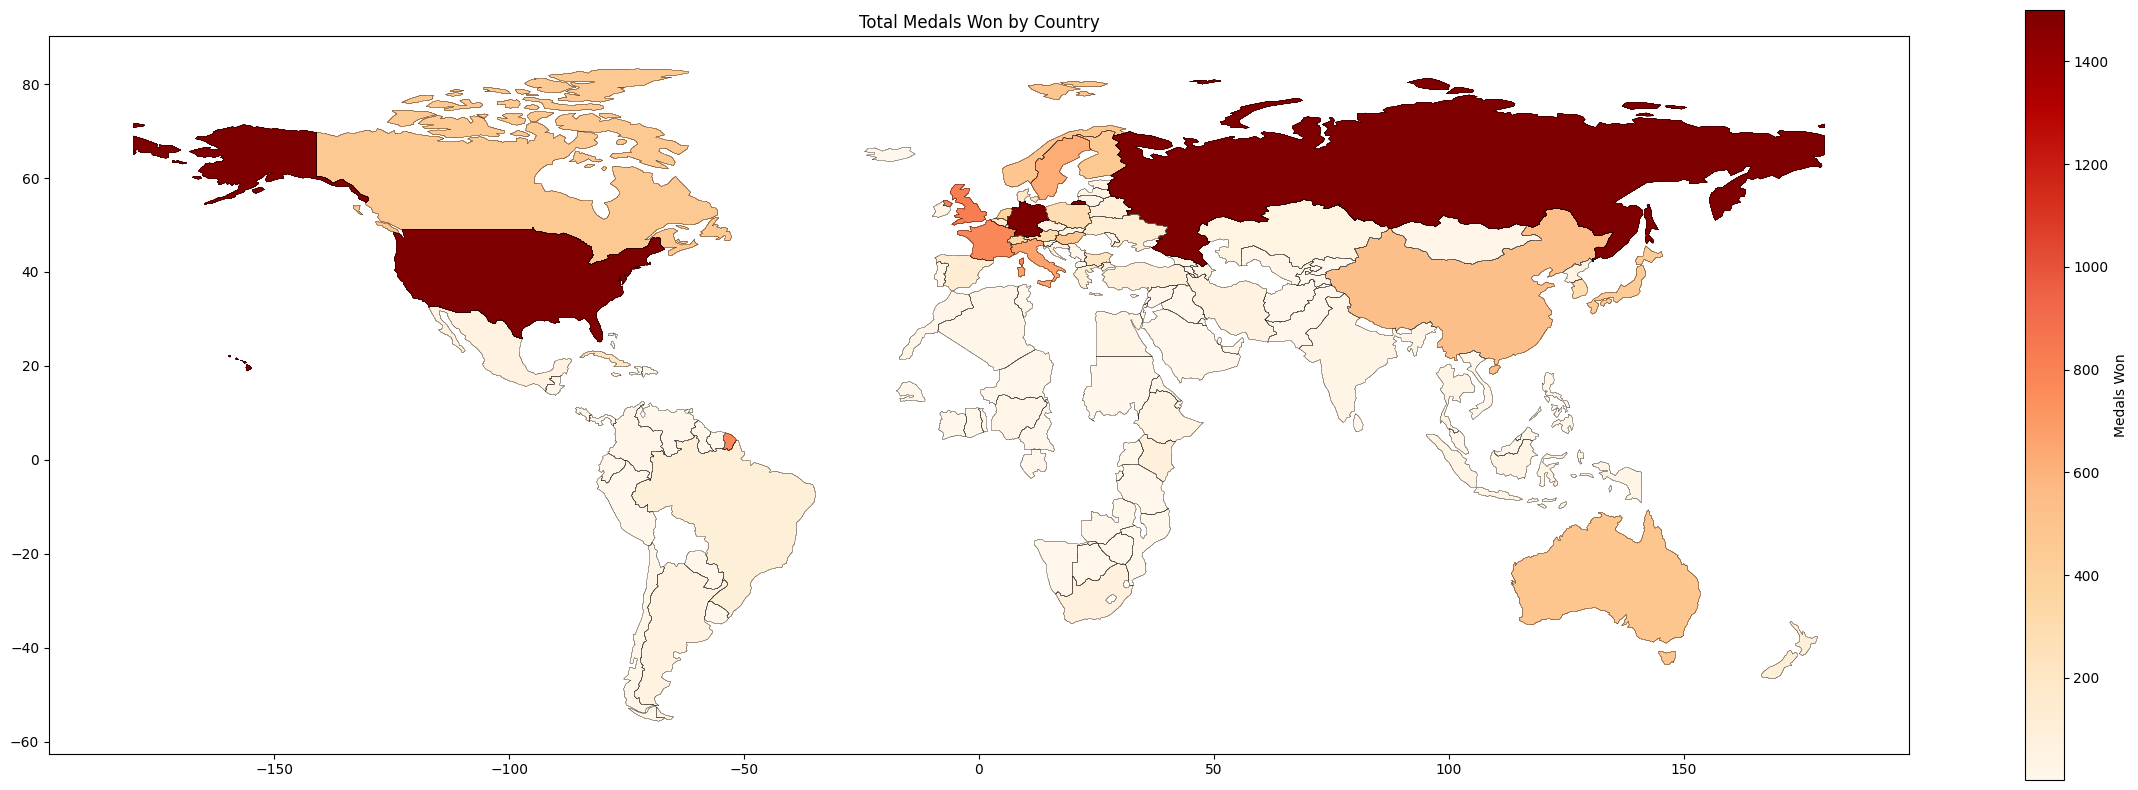

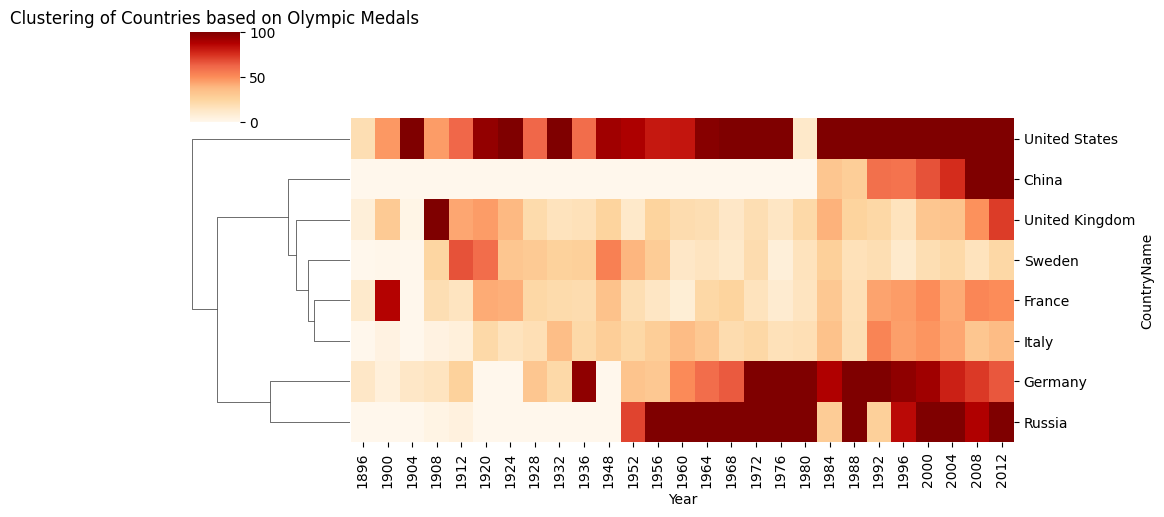

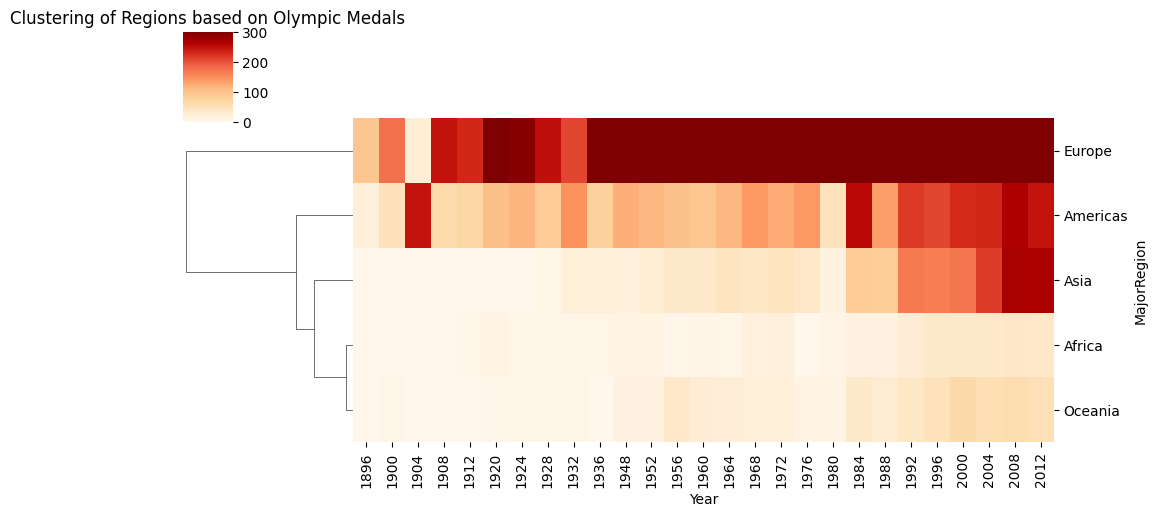

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(30, 10))


vmax_value = 1500

gdf.plot(ax=ax, column='MedalsWon_Total', cmap='OrRd', legend=True, legend_kwds={'label': "Medals Won"}, vmax=vmax_value)
gdf.plot(ax=ax, color='none', edgecolor='black', linewidth=0.01)
ax.set_title('Total Medals Won by Country')
plt.show()

cluster_data1 = filtered_df.pivot_table(index='CountryName', columns='Year', values='MedalsWon', aggfunc='sum')
cluster_data2 = Regions.pivot_table(index='MajorRegion', columns='Year', values='MedalsWon', aggfunc='sum')
vmax_value1 = 100
vmax_value2 = 300

sns.clustermap(cluster_data1, cmap='OrRd', method='average', col_cluster=False, figsize=(10, 5), vmax=vmax_value1)
plt.title('Clustering of Countries based on Olympic Medals')
plt.show()
sns.clustermap(cluster_data2, cmap='OrRd', method='average', col_cluster=False, figsize=(10, 5), vmax=vmax_value2)
plt.title('Clustering of Regions based on Olympic Medals')
plt.show()


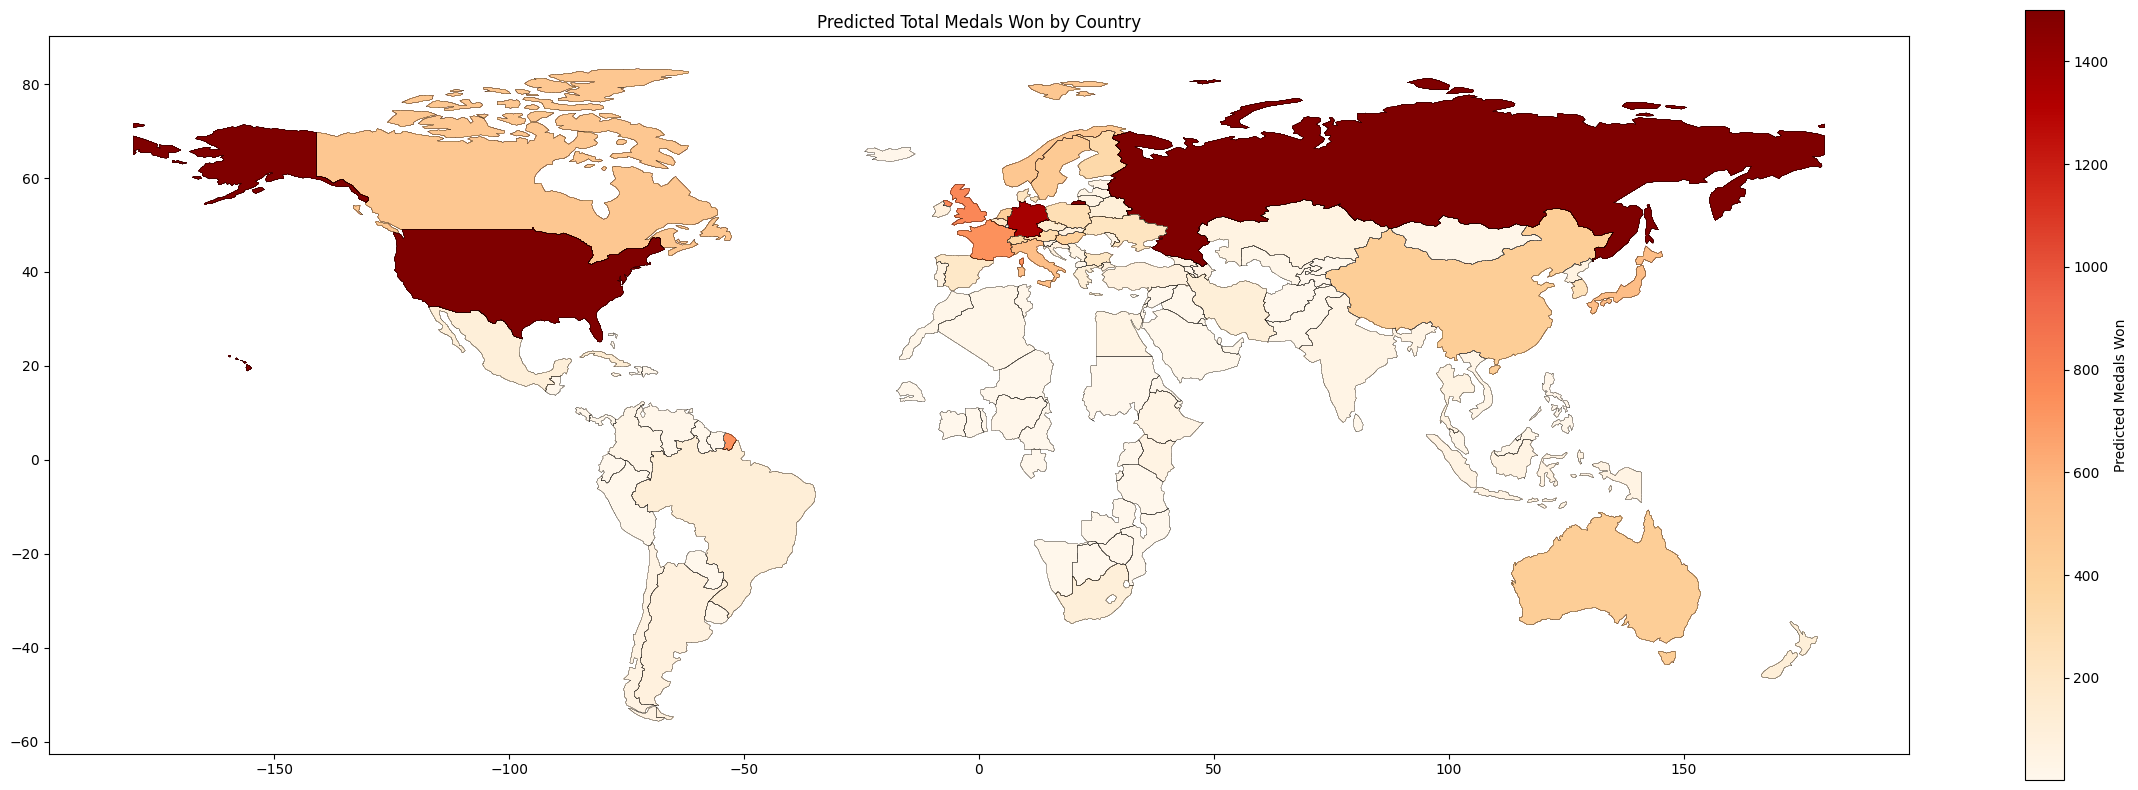

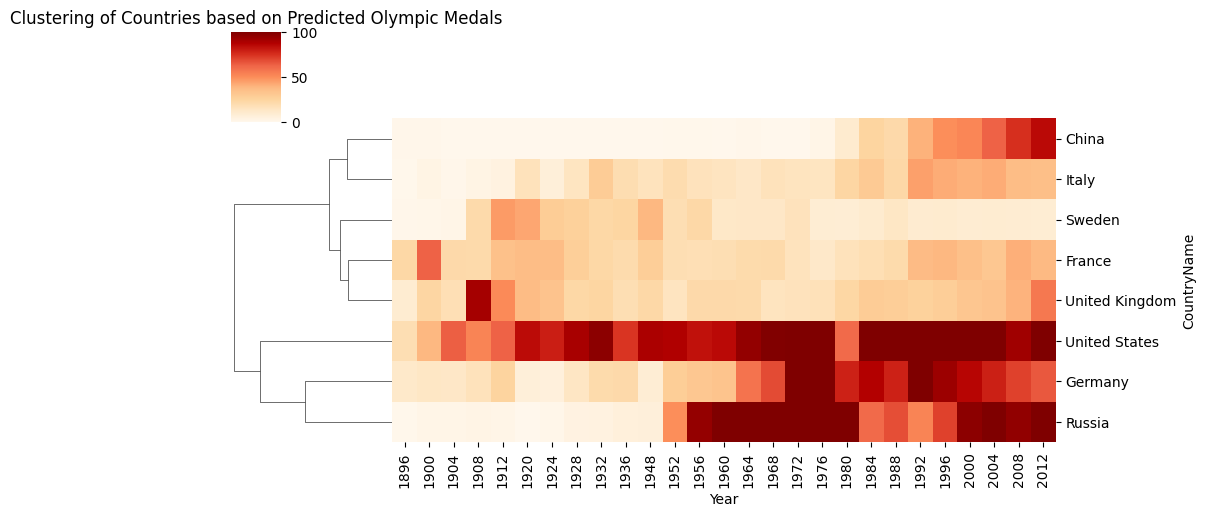

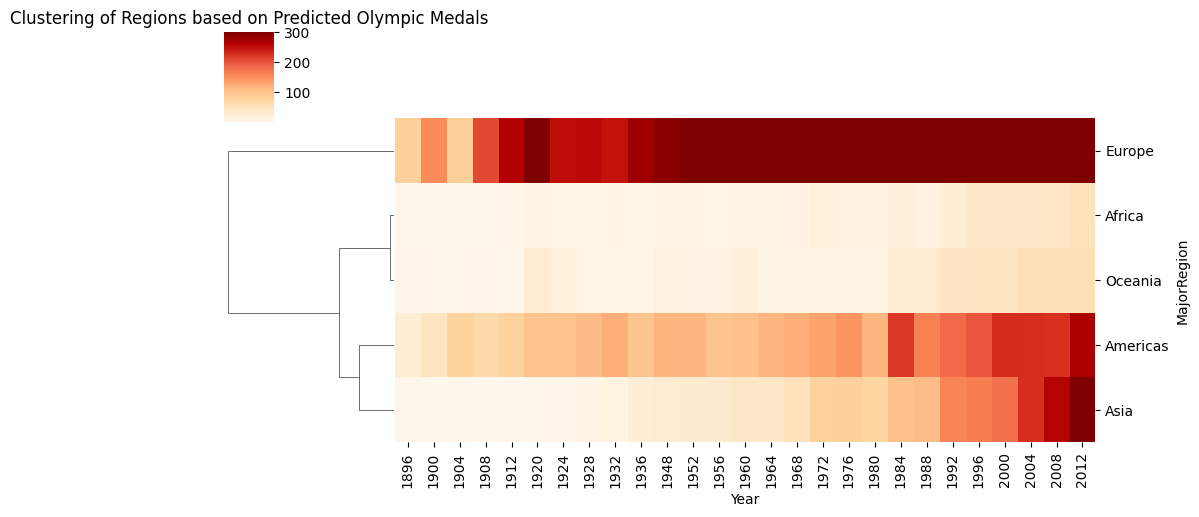

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(30, 10))


vmax_value = 1500

gdf.plot(ax=ax, column='PredSum', cmap='OrRd', legend=True, legend_kwds={'label': "Predicted Medals Won"}, vmax=vmax_value)
gdf.plot(ax=ax, color='none', edgecolor='black', linewidth=0.01)
ax.set_title('Predicted Total Medals Won by Country')
plt.show()

cluster_data1 = filtered_df.pivot_table(index='CountryName', columns='Year', values='pred', aggfunc='sum')
cluster_data2 = Regions.pivot_table(index='MajorRegion', columns='Year', values='pred', aggfunc='sum')
vmax_value1 = 100
vmax_value2 = 300

sns.clustermap(cluster_data1, cmap='OrRd', method='average', col_cluster=False, figsize=(10, 5), vmax=vmax_value1)
plt.title('Clustering of Countries based on Predicted Olympic Medals')
plt.show()
sns.clustermap(cluster_data2, cmap='OrRd', method='average', col_cluster=False, figsize=(10, 5), vmax=vmax_value2)
plt.title('Clustering of Regions based on Predicted Olympic Medals')
plt.show()


In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(30, 10))

vmax_value = 10
vmin_value = -5

gdf.plot(ax=ax, column='GDP', cmap='coolwarm', legend=True, legend_kwds={'label': "GDP Change"}, vmax=vmax_value, vmin = vmin_value)
gdf.plot(ax=ax, color='none', edgecolor='black', linewidth=0.01)
ax.set_title('GDP Change by Country')
plt.show()

cluster_data1 = filtered_df.pivot_table(index='CountryName', columns='Year', values='GDP', aggfunc='sum')
cluster_data2 = Regions.pivot_table(index='MajorRegion', columns='Year', values='GDP', aggfunc='sum')
vmax_value1 = 10
vmax_value2 = 8
sns.clustermap(cluster_data1, cmap='coolwarm', method='average', col_cluster=False, figsize=(10, 5), vmax=vmax_value1, vmin = vmin_value)
plt.title('Clustering of Countries based on GDP Change')
plt.show()
sns.clustermap(cluster_data2, cmap='coolwarm', method='average', col_cluster=False, figsize=(10, 5), vmax=vmax_value2, vmin = vmin_value)
plt.title('Clustering of Regions based on GDP Change')
plt.show()

scatterplot = sns.scatterplot(x='Year', y='GDP', hue='MajorRegion', size='MedalsWon', data=Regions, sizes=(30, 300), palette='coolwarm')
plt.title('Region Scatter Plot of Average GDP Change and Total Olympic Medals Over Time')
plt.xlabel('Year')
scatterplot.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize='small')
plt.show()
scatterplot = sns.scatterplot(x='Year', y='GDP', hue='CountryName', size='MedalsWon', data=filtered_df, sizes=(30, 300), palette='coolwarm')
plt.title('Top Country Scatter Plot of GDP Change and Olympic Medals Over Time')
plt.xlabel('Year')
scatterplot.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize='small')
plt.show()

sns.scatterplot(x='MedalsWon', y='GDP', hue='Country', data=filtered_df, palette='viridis', s=100)
plt.title('Medals Won vs Change in GDP')
plt.xlabel('Number of Medals Won')
plt.ylabel('Change in GDP')
plt.legend(title='Country', bbox_to_anchor=(1, 1))
scatterplot.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize='small')


NameError: ignored

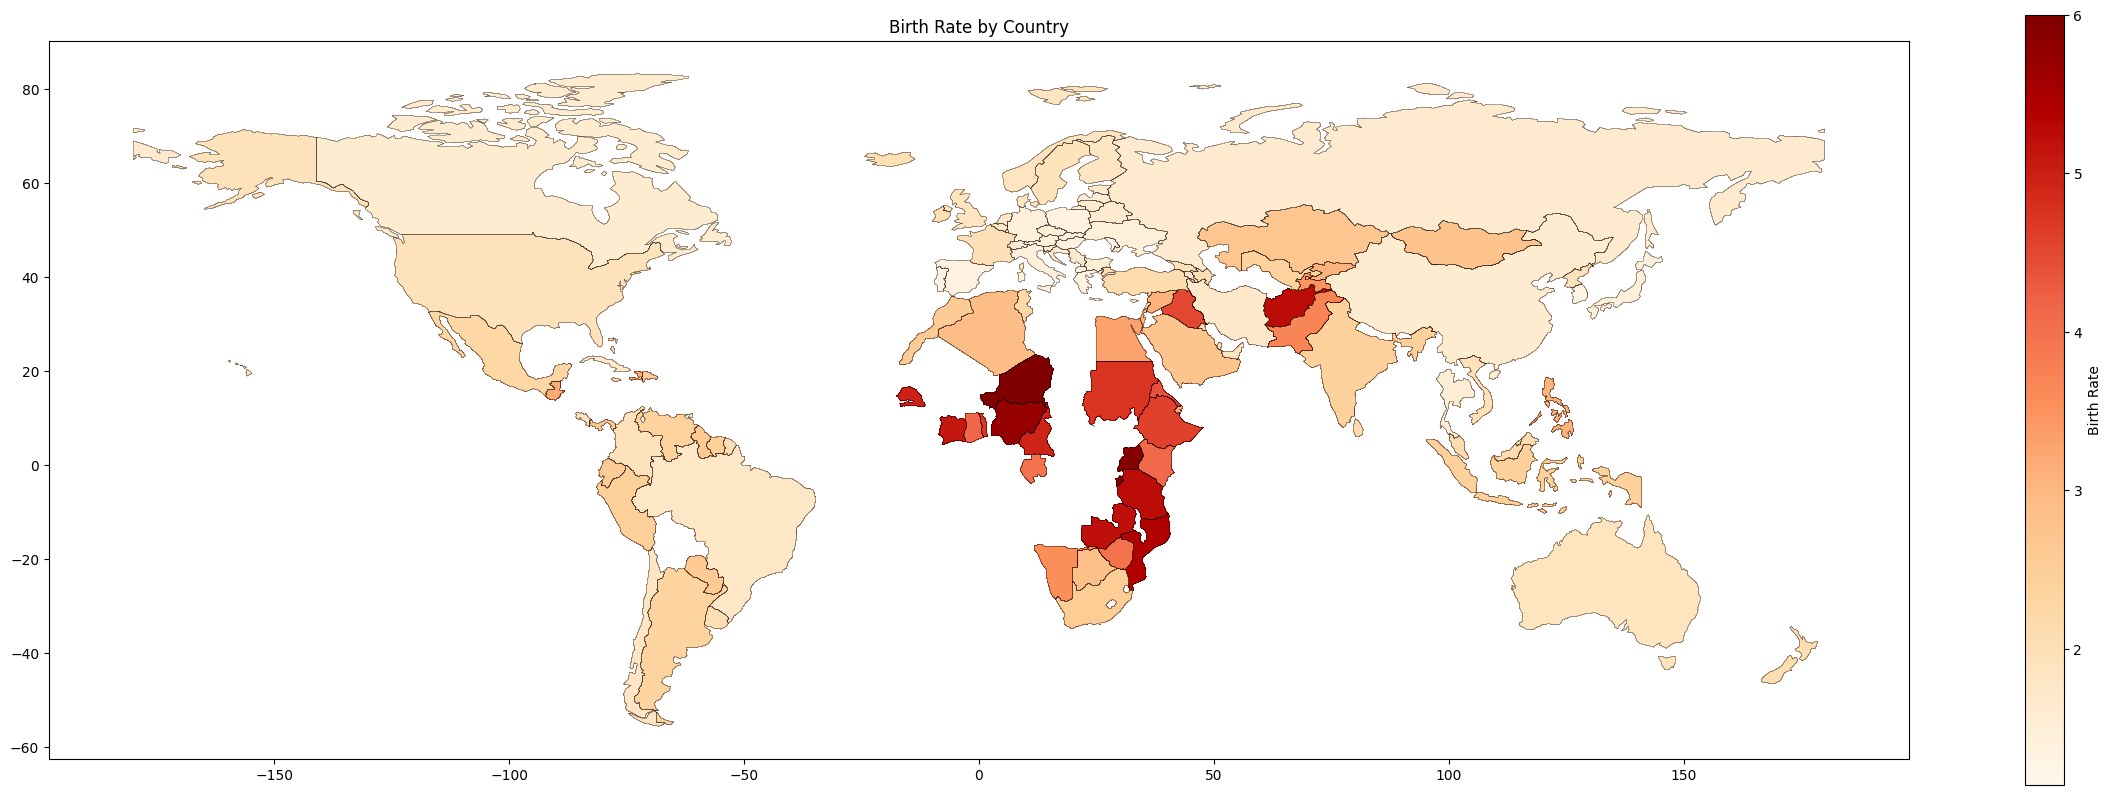

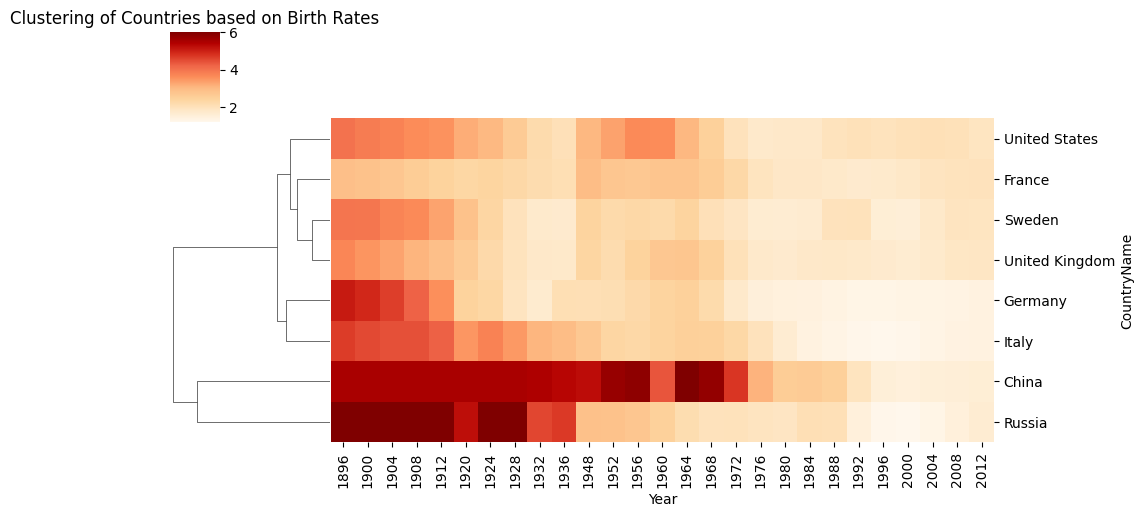

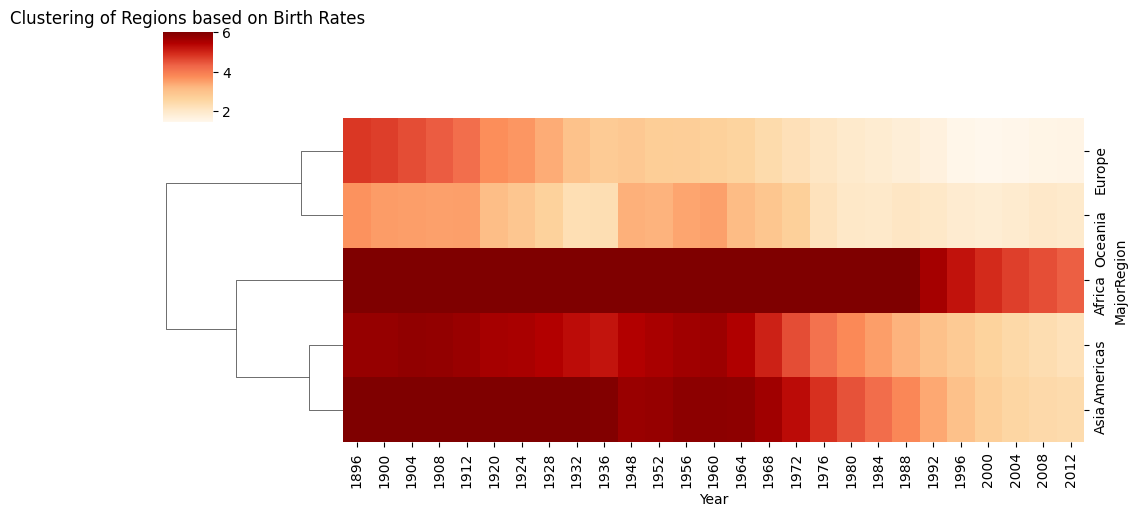

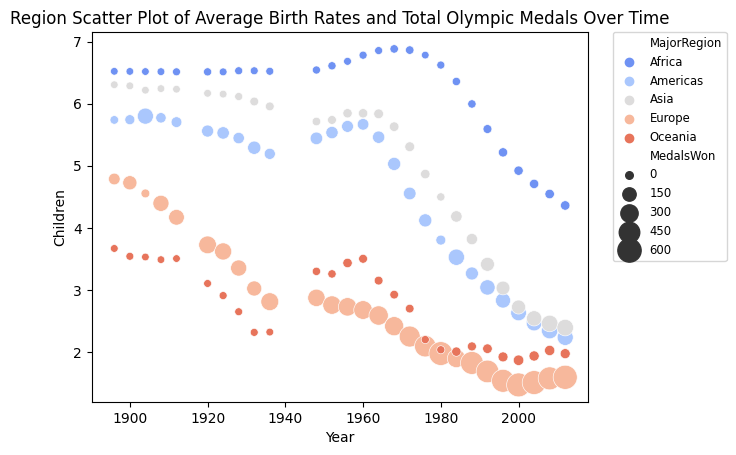

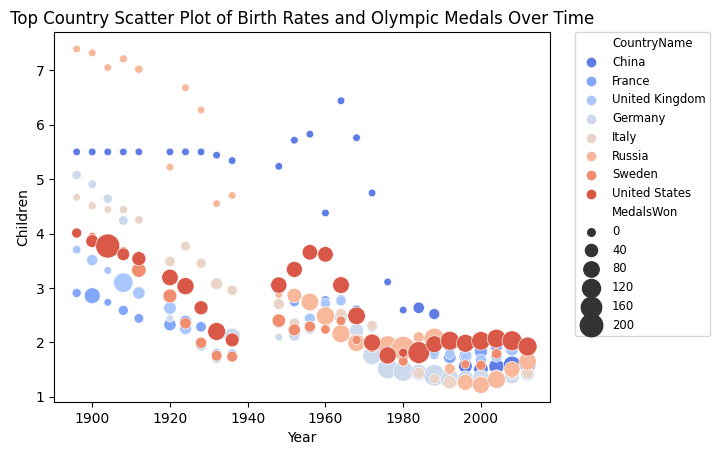

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(30, 10))

vmax_value = 6

gdf.plot(ax=ax, column='Children', cmap='OrRd', legend=True, legend_kwds={'label': "Birth Rate"}, vmax=vmax_value)
gdf.plot(ax=ax, color='none', edgecolor='black', linewidth=0.01)
ax.set_title('Birth Rate by Country')
plt.show()

cluster_data1 = filtered_df.pivot_table(index='CountryName', columns='Year', values='Children', aggfunc='sum')
cluster_data2 = Regions.pivot_table(index='MajorRegion', columns='Year', values='Children', aggfunc='sum')
vmax_value1 = 6
vmax_value2 = 6
sns.clustermap(cluster_data1, cmap='OrRd', method='average', col_cluster=False, figsize=(10, 5), vmax=vmax_value1)
plt.title('Clustering of Countries based on Birth Rates')
plt.show()
sns.clustermap(cluster_data2, cmap='OrRd', method='average', col_cluster=False, figsize=(10, 5), vmax=vmax_value2)
plt.title('Clustering of Regions based on Birth Rates')
plt.show()

scatterplot = sns.scatterplot(x='Year', y='Children', hue='MajorRegion', size='MedalsWon', data=Regions, sizes=(30, 300), palette='coolwarm')
plt.title('Region Scatter Plot of Average Birth Rates and Total Olympic Medals Over Time')
plt.xlabel('Year')
scatterplot.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize='small')
plt.show()
scatterplot = sns.scatterplot(x='Year', y='Children', hue='CountryName', size='MedalsWon', data=filtered_df, sizes=(30, 300), palette='coolwarm')
plt.title('Top Country Scatter Plot of Birth Rates and Olympic Medals Over Time')
plt.xlabel('Year')
scatterplot.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize='small')
plt.show()

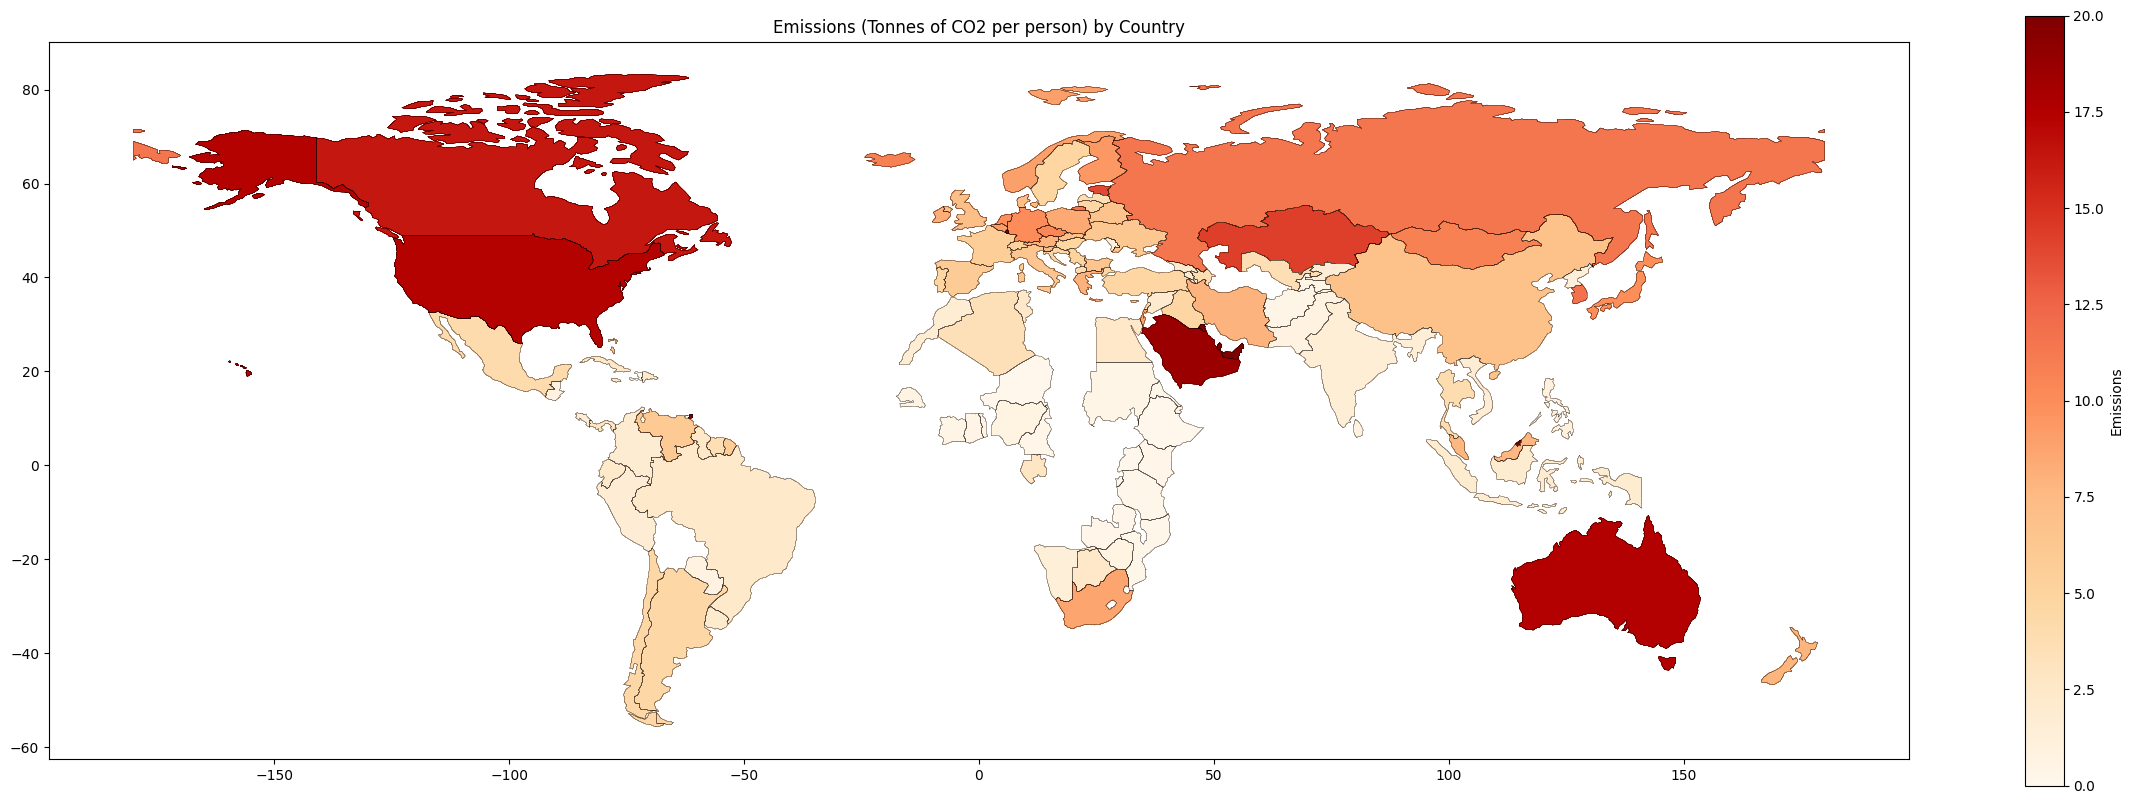

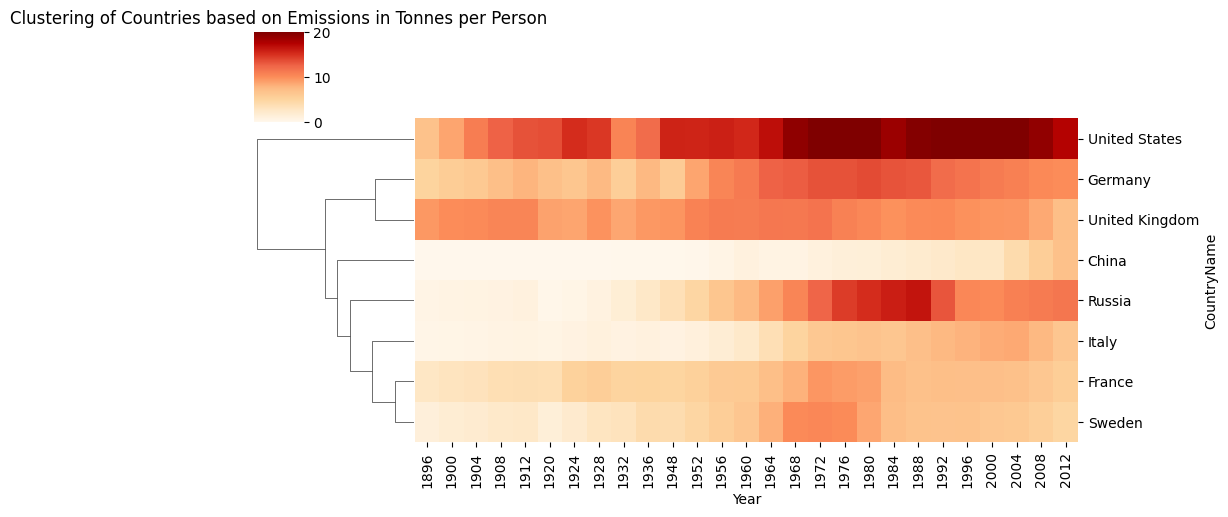

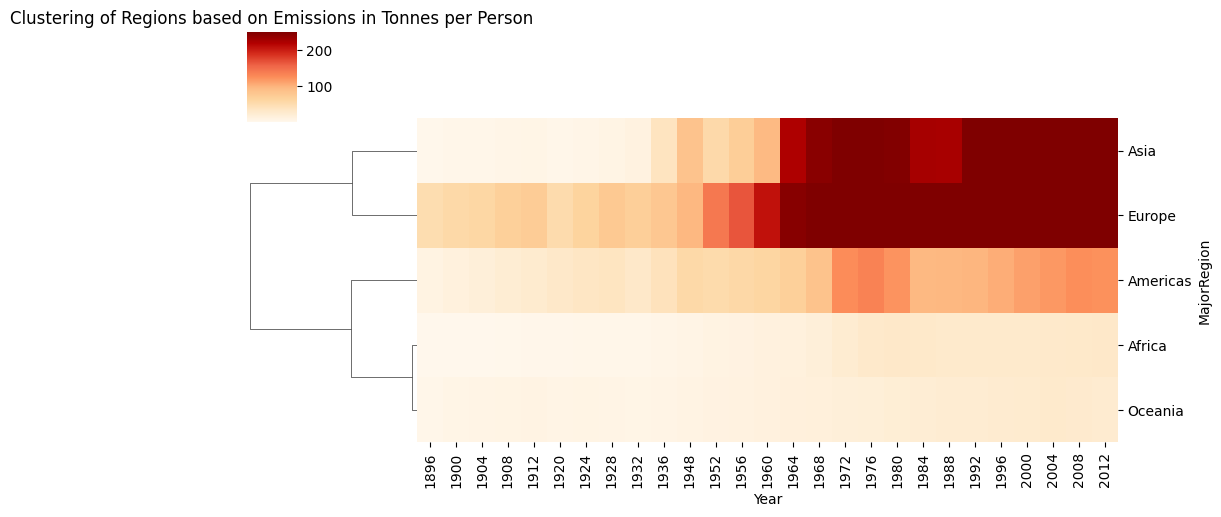

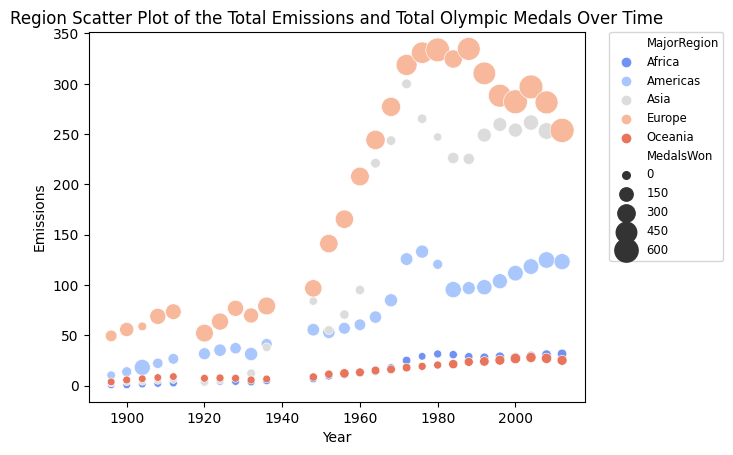

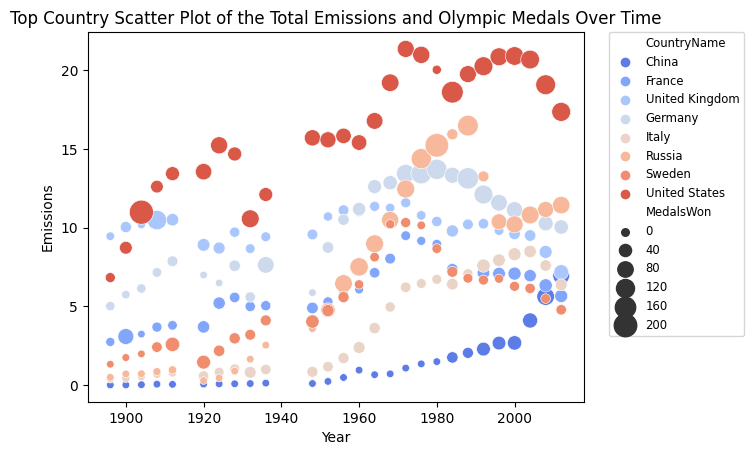

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(30, 10))

vmax_value = 20

gdf.plot(ax=ax, column='Emissions', cmap='OrRd', legend=True, legend_kwds={'label': "Emissions"}, vmax=vmax_value)
gdf.plot(ax=ax, color='none', edgecolor='black', linewidth=0.01)
ax.set_title('Emissions (Tonnes of CO2 per person) by Country')
plt.show()

cluster_data1 = filtered_df.pivot_table(index='CountryName', columns='Year', values='Emissions', aggfunc='sum')
cluster_data2 = Regions.pivot_table(index='MajorRegion', columns='Year', values='Emissions', aggfunc='sum')
vmax_value1 = 20
vmax_value2 = 250
sns.clustermap(cluster_data1, cmap='OrRd', method='average', col_cluster=False, figsize=(10, 5), vmax=vmax_value1)
plt.title('Clustering of Countries based on Emissions in Tonnes per Person')
plt.show()
sns.clustermap(cluster_data2, cmap='OrRd', method='average', col_cluster=False, figsize=(10, 5), vmax=vmax_value2)
plt.title('Clustering of Regions based on Emissions in Tonnes per Person')
plt.show()

scatterplot = sns.scatterplot(x='Year', y='Emissions', hue='MajorRegion', size='MedalsWon', data=Regions, sizes=(30, 300), palette='coolwarm')
plt.title('Region Scatter Plot of the Total Emissions and Total Olympic Medals Over Time')
plt.xlabel('Year')
scatterplot.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize='small')
plt.show()
scatterplot = sns.scatterplot(x='Year', y='Emissions', hue='CountryName', size='MedalsWon', data=filtered_df, sizes=(30, 300), palette='coolwarm')
plt.title('Top Country Scatter Plot of the Total Emissions and Olympic Medals Over Time')
plt.xlabel('Year')
scatterplot.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize='small')
plt.show()

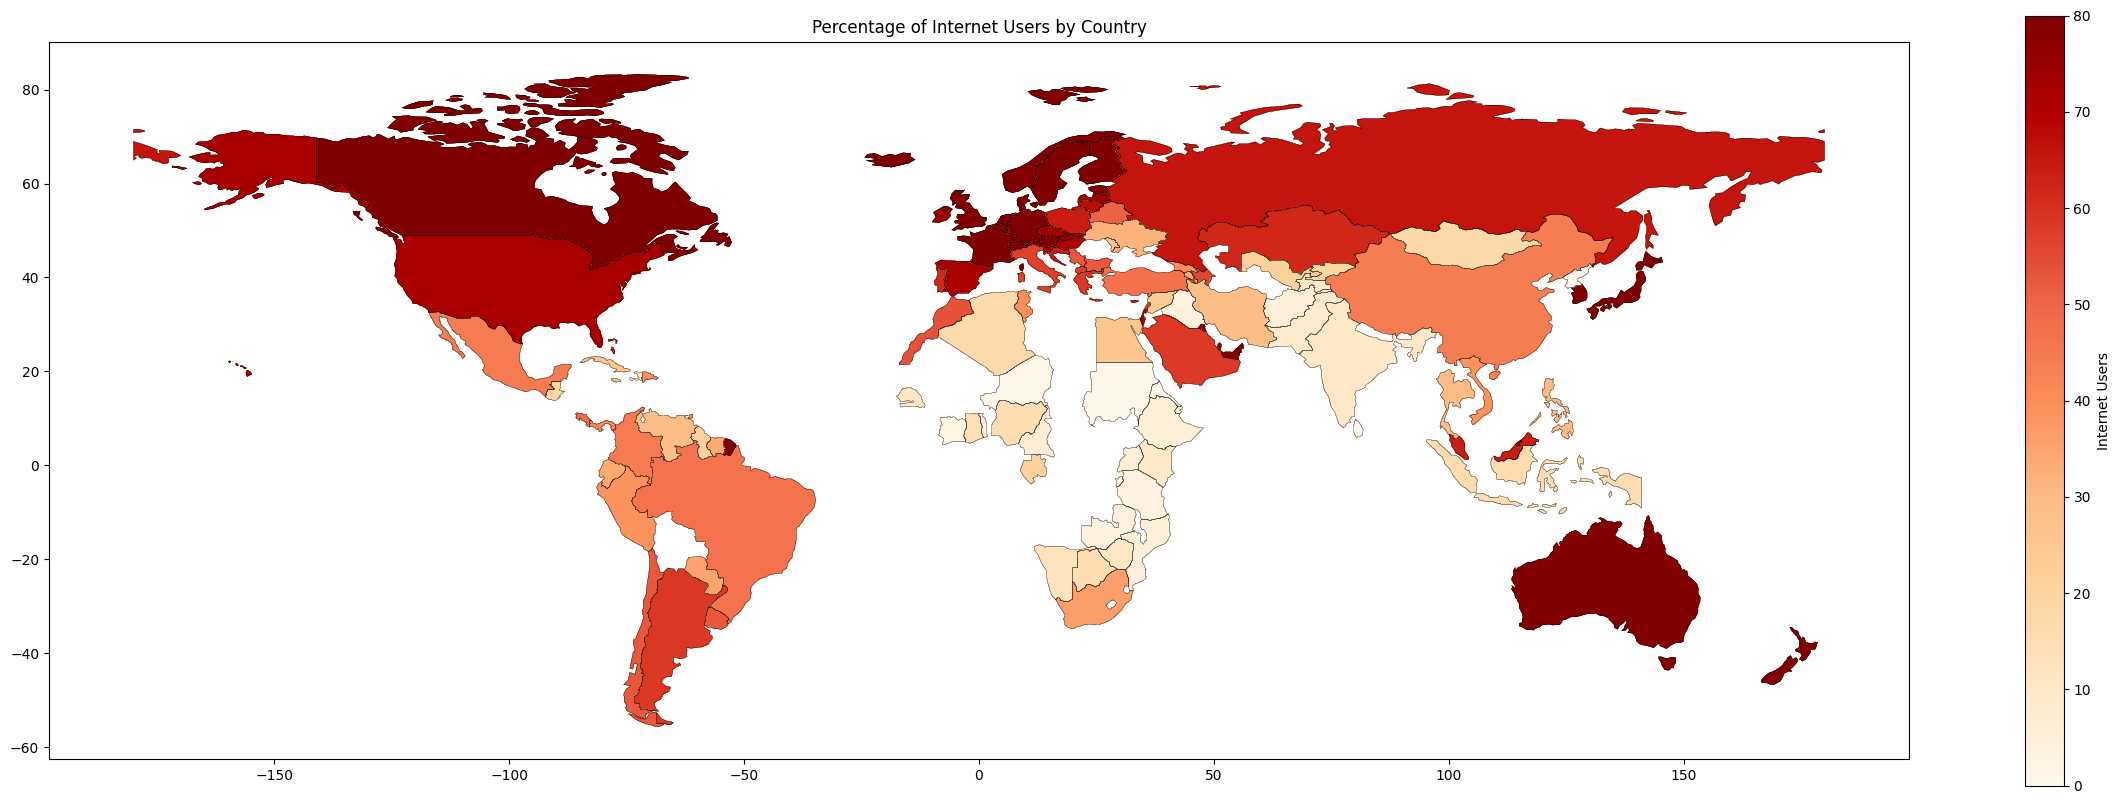

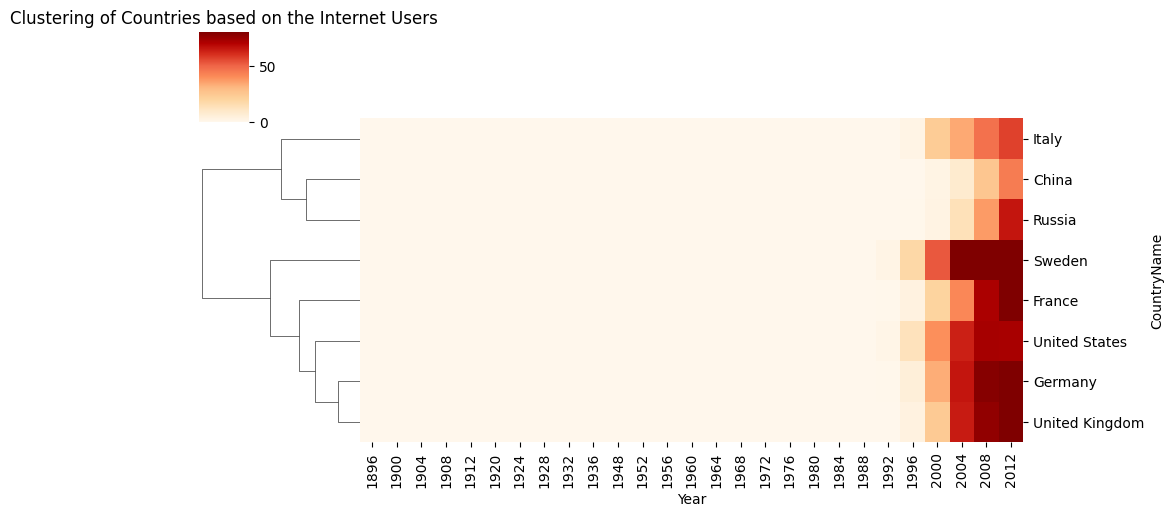

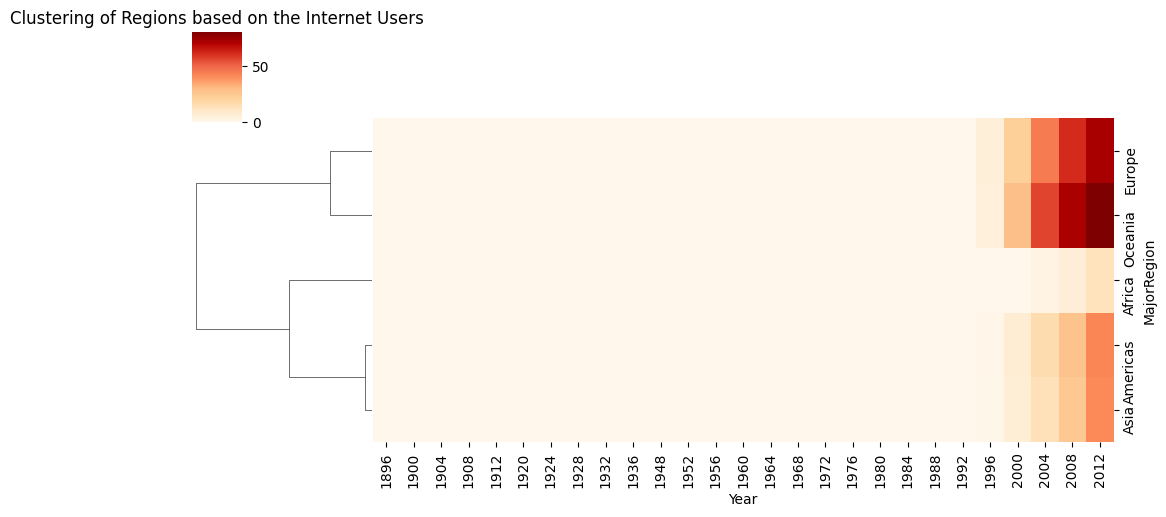

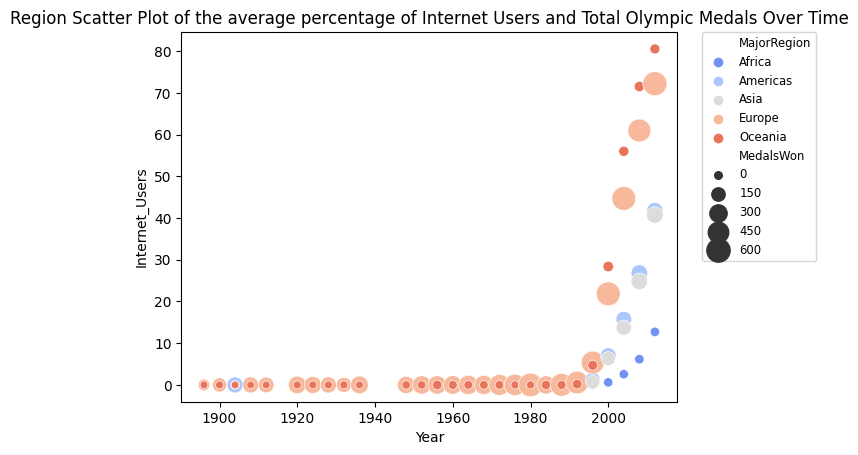

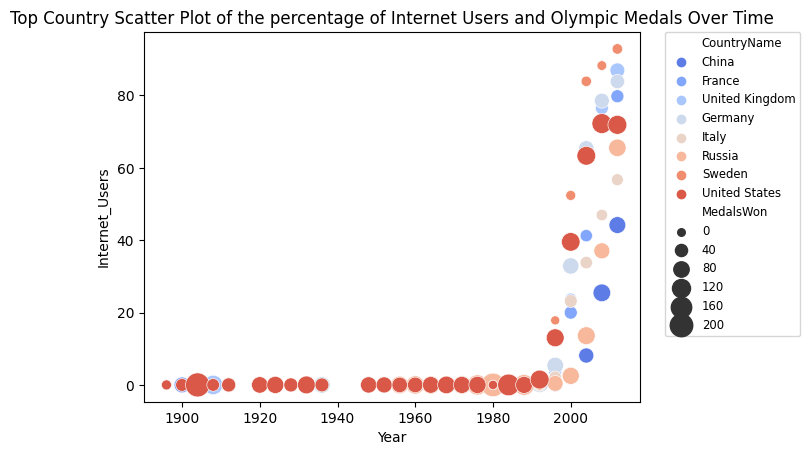

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(30, 10))

vmax_value = 80

gdf.plot(ax=ax, column='Internet_Users', cmap='OrRd', legend=True, legend_kwds={'label': "Internet Users"}, vmax = vmax_value)
gdf.plot(ax=ax, color='none', edgecolor='black', linewidth=0.01)
ax.set_title('Percentage of Internet Users by Country')
plt.show()

cluster_data1 = filtered_df.pivot_table(index='CountryName', columns='Year', values='Internet_Users', aggfunc='sum')
cluster_data2 = Regions.pivot_table(index='MajorRegion', columns='Year', values='Internet_Users', aggfunc='sum')
vmax_value1 = 80
vmax_value2 = 80
sns.clustermap(cluster_data1, cmap='OrRd', method='average', col_cluster=False, figsize=(10, 5), vmax=vmax_value1)
plt.title('Clustering of Countries based on the Internet Users')
plt.show()
sns.clustermap(cluster_data2, cmap='OrRd', method='average', col_cluster=False, figsize=(10, 5), vmax=vmax_value2)
plt.title('Clustering of Regions based on the Internet Users')
plt.show()

scatterplot = sns.scatterplot(x='Year', y='Internet_Users', hue='MajorRegion', size='MedalsWon', data=Regions, sizes=(30, 300), palette='coolwarm')
plt.title('Region Scatter Plot of the average percentage of Internet Users and Total Olympic Medals Over Time')
plt.xlabel('Year')
scatterplot.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize='small')
plt.show()
scatterplot = sns.scatterplot(x='Year', y='Internet_Users', hue='CountryName', size='MedalsWon', data=filtered_df, sizes=(30, 300), palette='coolwarm')
plt.title('Top Country Scatter Plot of the percentage of Internet Users and Olympic Medals Over Time')
plt.xlabel('Year')
scatterplot.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize='small')
plt.show()


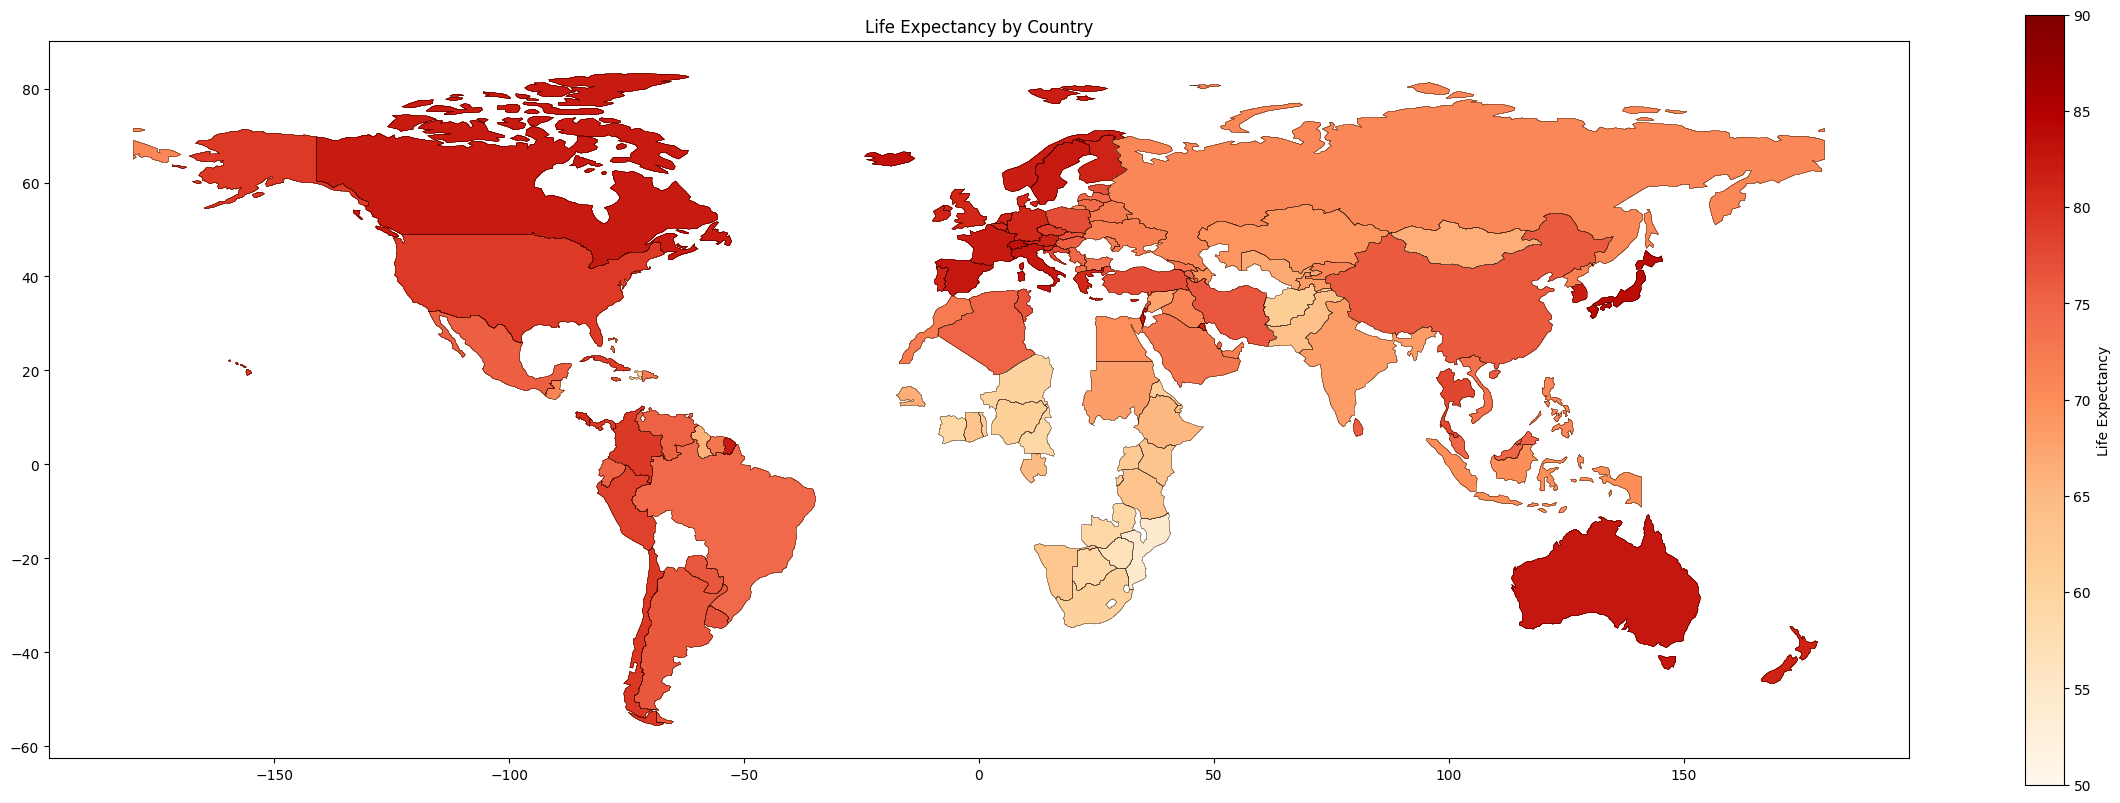

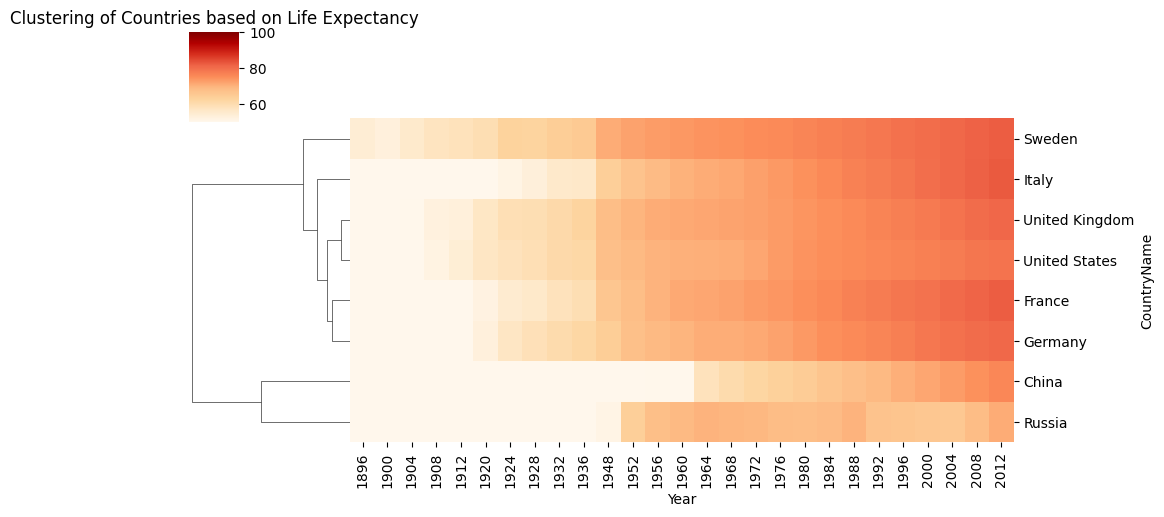

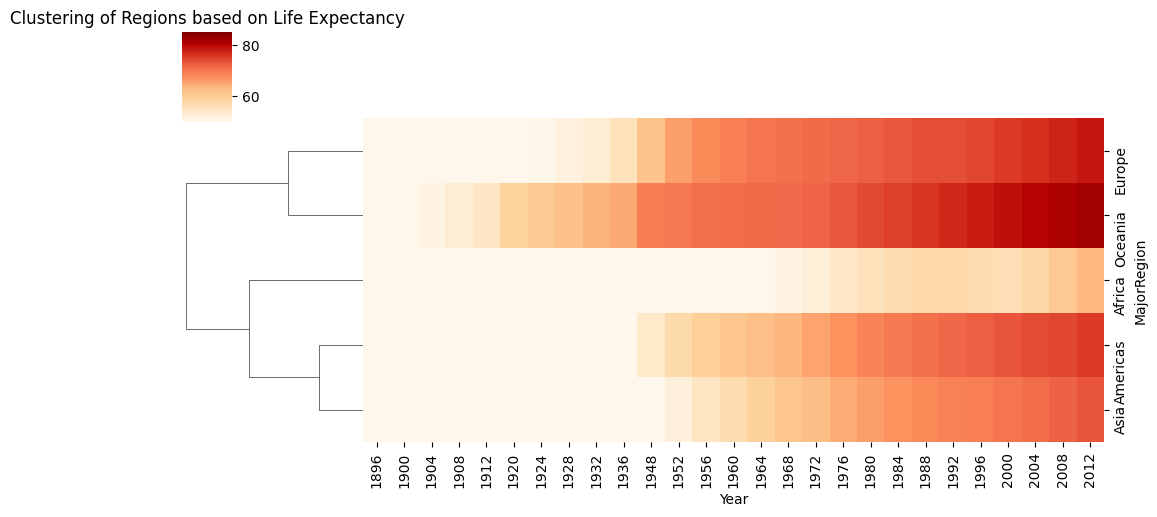

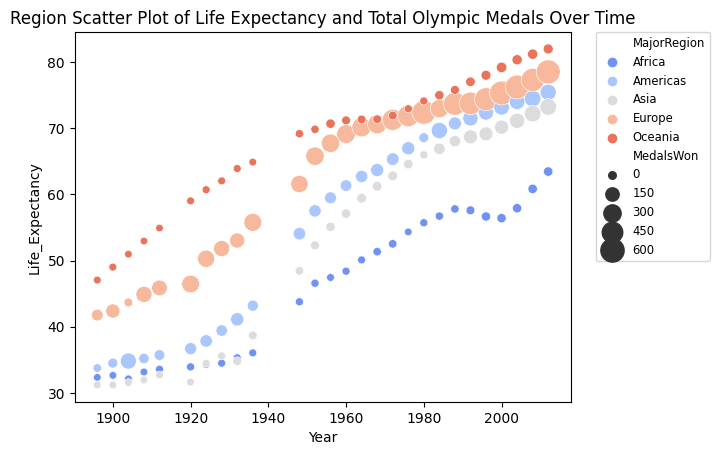

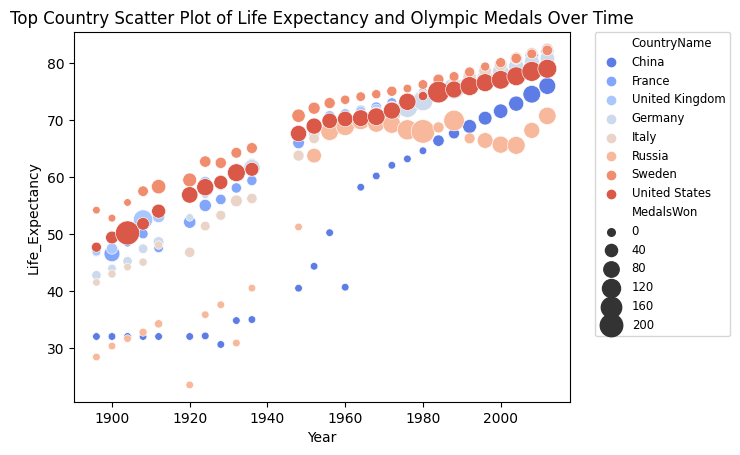

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(30, 10))

vmax_value = 90
vmin_value = 50

gdf.plot(ax=ax, column='Life_Expectancy', cmap='OrRd', legend=True, legend_kwds={'label': "Life Expectancy"}, vmax=vmax_value, vmin=vmin_value)
gdf.plot(ax=ax, color='none', edgecolor='black', linewidth=0.01)
ax.set_title('Life Expectancy by Country')
plt.show()

cluster_data1 = filtered_df.pivot_table(index='CountryName', columns='Year', values='Life_Expectancy', aggfunc='sum')
cluster_data2 = Regions.pivot_table(index='MajorRegion', columns='Year', values='Life_Expectancy', aggfunc='sum')
vmax_value1 = 100
vmax_value2 = 85
sns.clustermap(cluster_data1, cmap='OrRd', method='average', col_cluster=False, figsize=(10, 5), vmax=vmax_value1, vmin=vmin_value)
plt.title('Clustering of Countries based on Life Expectancy')
plt.show()
sns.clustermap(cluster_data2, cmap='OrRd', method='average', col_cluster=False, figsize=(10, 5), vmax=vmax_value2, vmin=vmin_value)
plt.title('Clustering of Regions based on Life Expectancy')
plt.show()

scatterplot = sns.scatterplot(x='Year', y='Life_Expectancy', hue='MajorRegion', size='MedalsWon', data=Regions, sizes=(30, 300), palette='coolwarm')
plt.title('Region Scatter Plot of Life Expectancy and Total Olympic Medals Over Time')
plt.xlabel('Year')
scatterplot.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize='small')
plt.show()
scatterplot = sns.scatterplot(x='Year', y='Life_Expectancy', hue='CountryName', size='MedalsWon', data=filtered_df, sizes=(30, 300), palette='coolwarm')
plt.title('Top Country Scatter Plot of Life Expectancy and Olympic Medals Over Time')
plt.xlabel('Year')
scatterplot.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize='small')
plt.show()

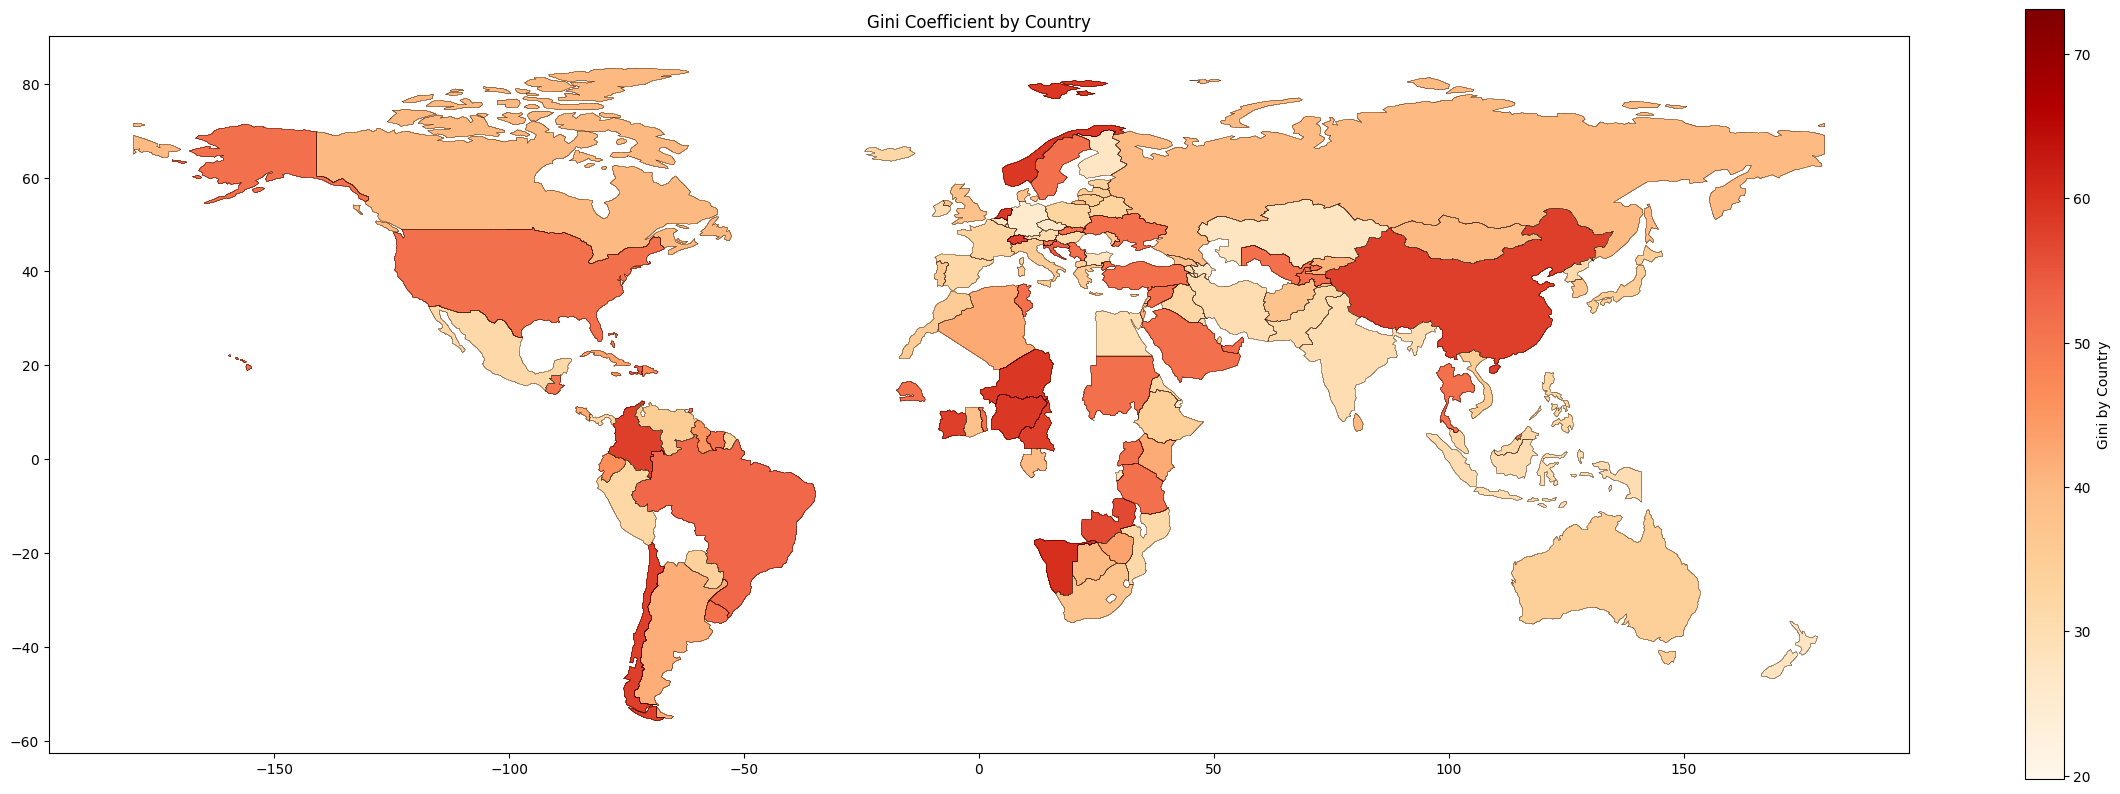

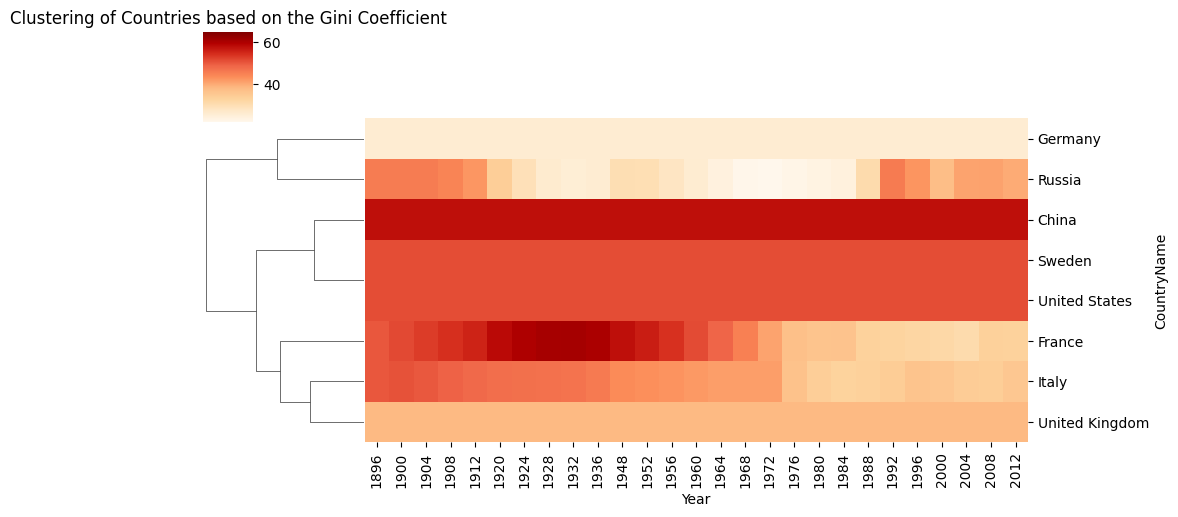

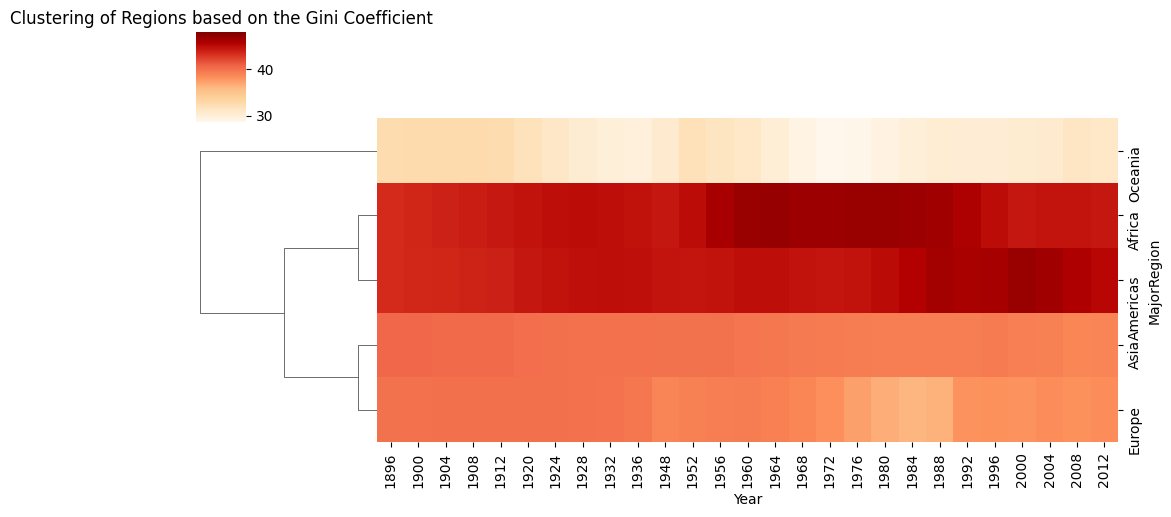

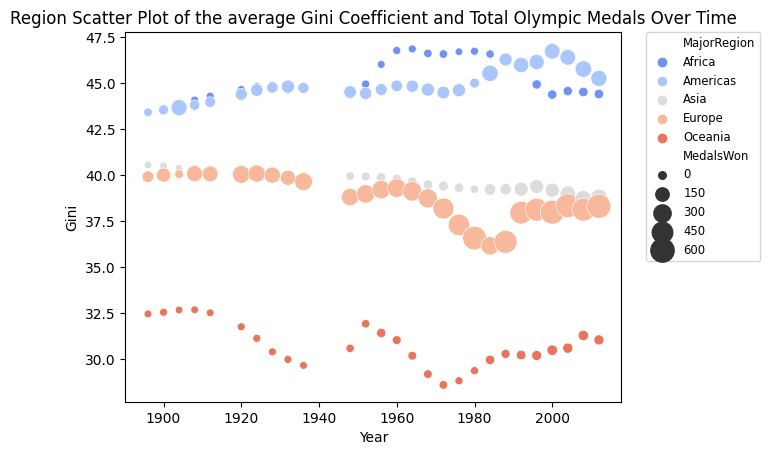

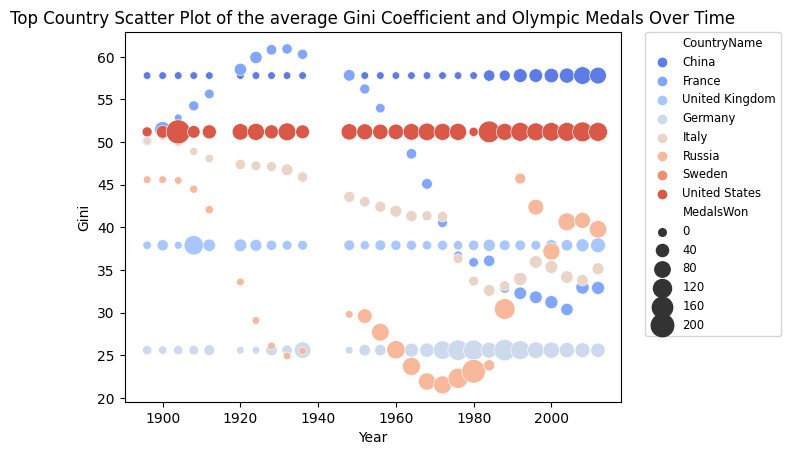

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(30, 10))

gdf.plot(ax=ax, column='Gini', cmap='OrRd', legend=True, legend_kwds={'label': "Gini by Country"})
gdf.plot(ax=ax, color='none', edgecolor='black', linewidth=0.01)  # Add country borders
ax.set_title('Gini Coefficient by Country')
plt.show()

cluster_data1 = filtered_df.pivot_table(index='CountryName', columns='Year', values='Gini', aggfunc='sum')
cluster_data2 = Regions.pivot_table(index='MajorRegion', columns='Year', values='Gini', aggfunc='sum')
vmax_value1 = 65
vmax_value2 = 48
sns.clustermap(cluster_data1, cmap='OrRd', method='average', col_cluster=False, figsize=(10, 5), vmax=vmax_value1)
plt.title('Clustering of Countries based on the Gini Coefficient')
plt.show()
sns.clustermap(cluster_data2, cmap='OrRd', method='average', col_cluster=False, figsize=(10, 5), vmax=vmax_value2)
plt.title('Clustering of Regions based on the Gini Coefficient')
plt.show()

scatterplot = sns.scatterplot(x='Year', y='Gini', hue='MajorRegion', size='MedalsWon', data=Regions, sizes=(30, 300), palette='coolwarm')
plt.title('Region Scatter Plot of the average Gini Coefficient and Total Olympic Medals Over Time')
plt.xlabel('Year')
scatterplot.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize='small')
plt.show()
scatterplot = sns.scatterplot(x='Year', y='Gini', hue='CountryName', size='MedalsWon', data=filtered_df, sizes=(30, 300), palette='coolwarm')
plt.title('Top Country Scatter Plot of the average Gini Coefficient and Olympic Medals Over Time')
plt.xlabel('Year')
scatterplot.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize='small')
plt.show()

In [ ]:
gdf

,Country,Year,MedalsWon,GDP,Children,Emissions,Gini,Internet_Users,Life_Expectancy,Population,MedalsWon_Total,pred,SubRegion,MajorRegion,geometry,CountryName
0,AFG,1896,0,1.050000,7.0000,0.00000,38.350,0.000000,32.625,4610000.0,2,3.34,Southern Asia,Asia,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",Afghanistan
1,AFG,1900,0,1.050000,7.0000,0.00000,39.550,0.000000,33.400,4732500.0,2,3.34,Southern Asia,Asia,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",Afghanistan
2,AFG,1904,0,1.050000,7.0000,0.00000,40.750,0.000000,34.200,4950000.0,2,3.34,Southern Asia,Asia,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",Afghanistan
3,AFG,1908,0,1.050000,7.0000,0.00000,42.000,0.000000,34.950,5270000.0,2,3.34,Southern Asia,Asia,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",Afghanistan
4,AFG,1912,0,1.142500,7.0000,0.00000,42.425,0.000000,35.700,6422500.0,2,3.34,Southern Asia,Asia,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",Afghanistan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3343,ZIM,1996,0,3.984250,4.2900,1.26000,38.550,0.014830,51.900,11275000.0,8,13.95,Eastern Africa,Africa,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151...",Zimbabwe
3344,ZIM,2000,0,-2.958750,4.0450,1.13400,41.250,0.361175,47.400,11850000.0,8,13.95,Eastern Africa,Africa,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151...",Zimbabwe
3345,ZIM,2004,3,-8.297500,3.9875,0.85275,42.950,1.850000,46.750,12200000.0,8,13.95,Eastern Africa,Africa,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151...",Zimbabwe
3346,ZIM,2008,4,-2.010000,4.0150,0.61875,43.100,3.225000,49.900,12650000.0,8,13.95,Eastern Africa,Africa,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151...",Zimbabwe


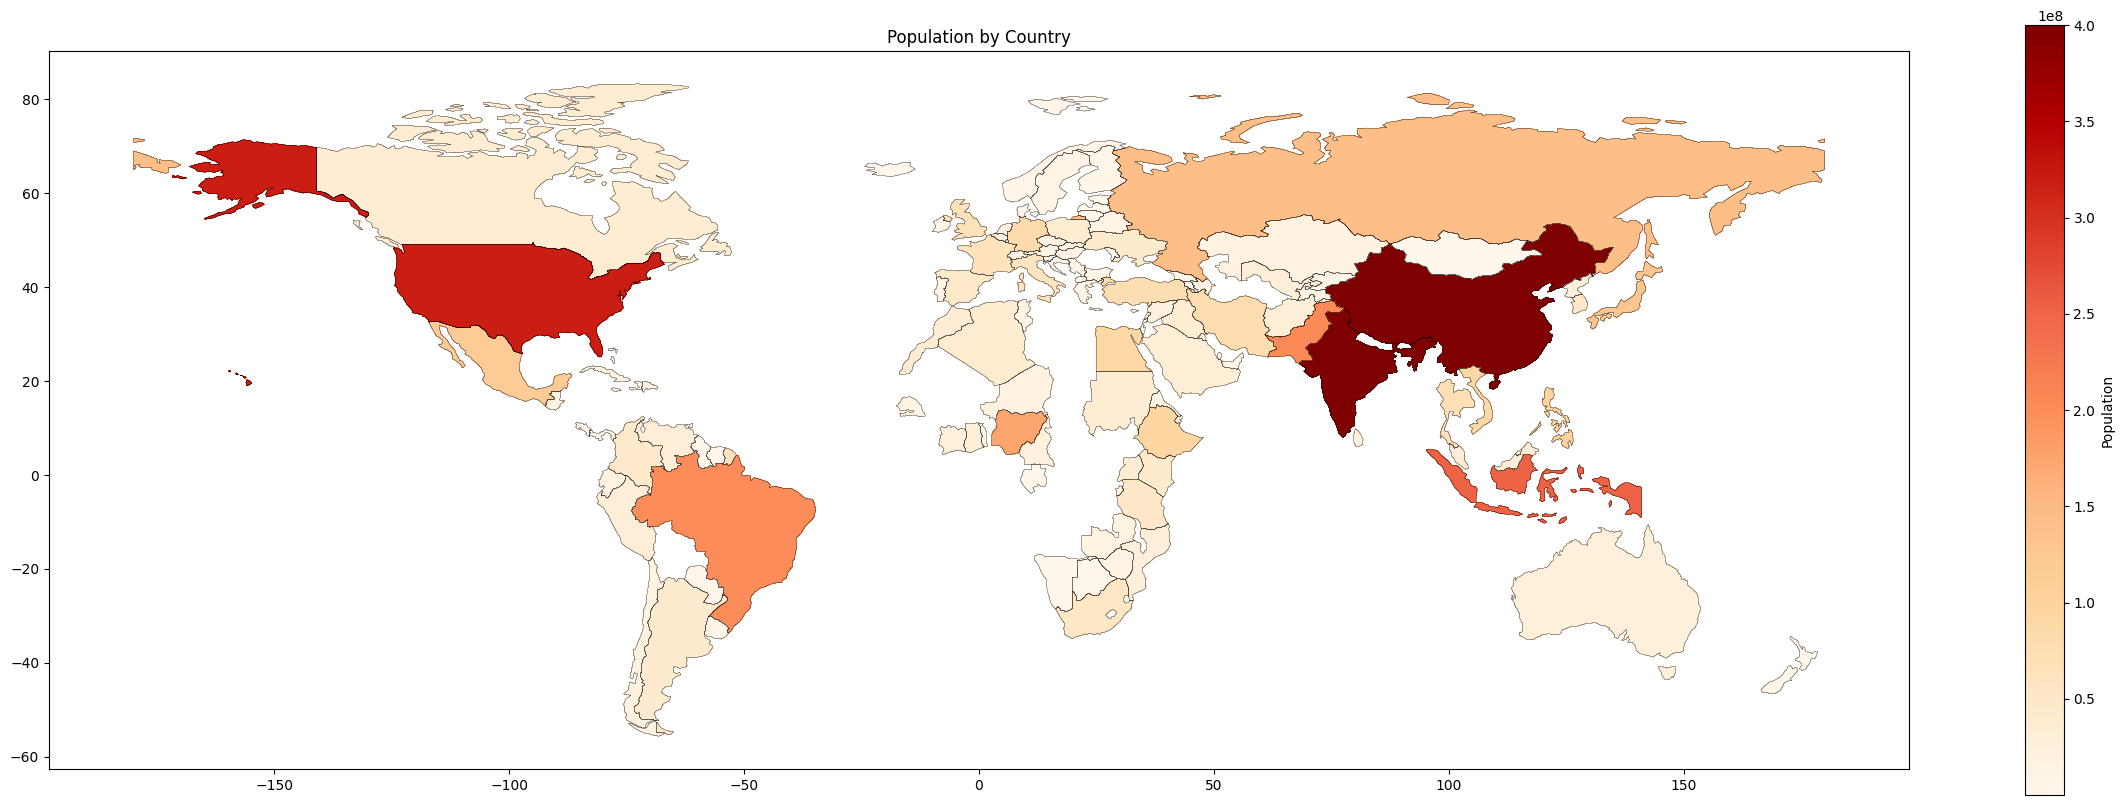

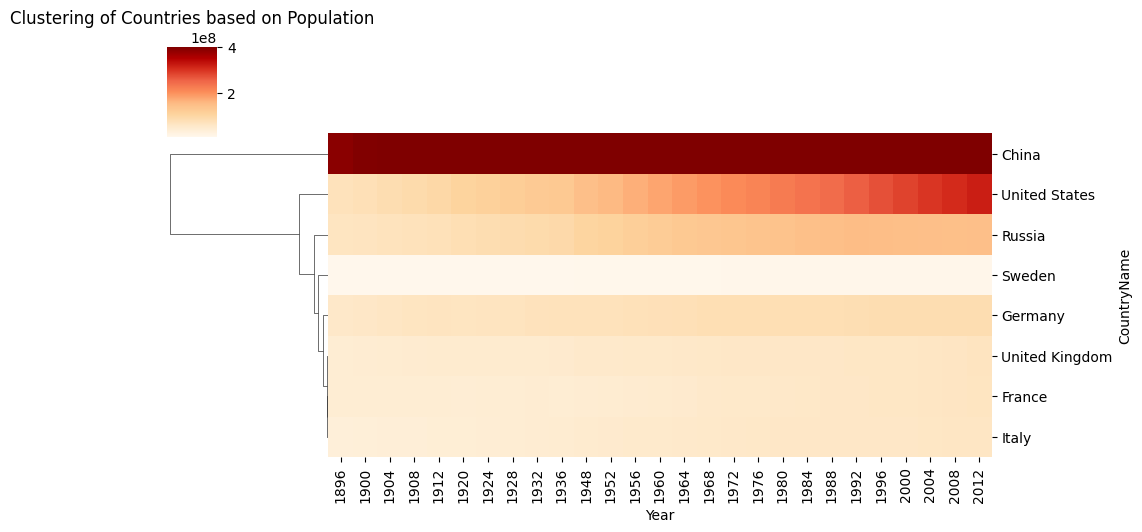

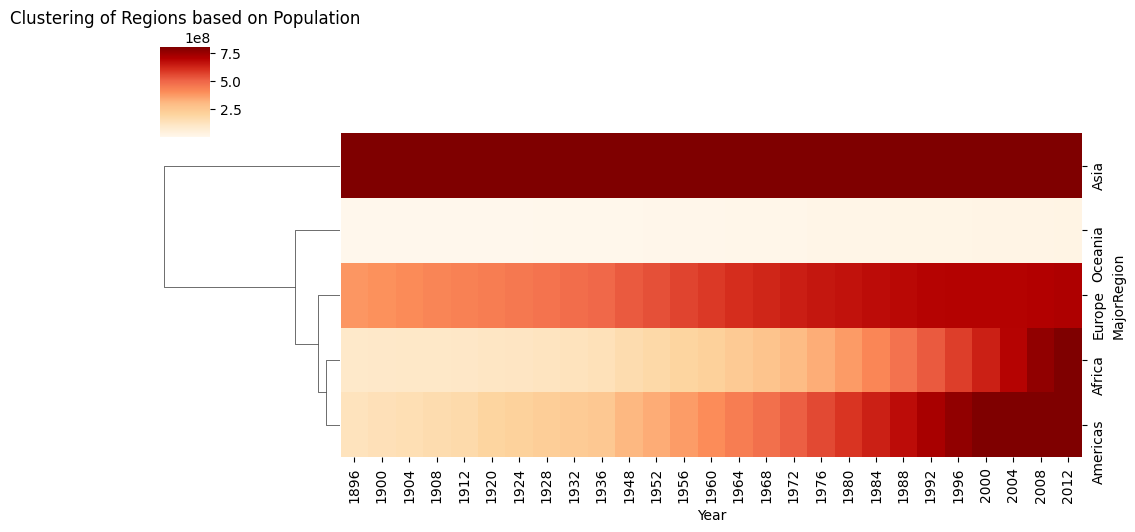

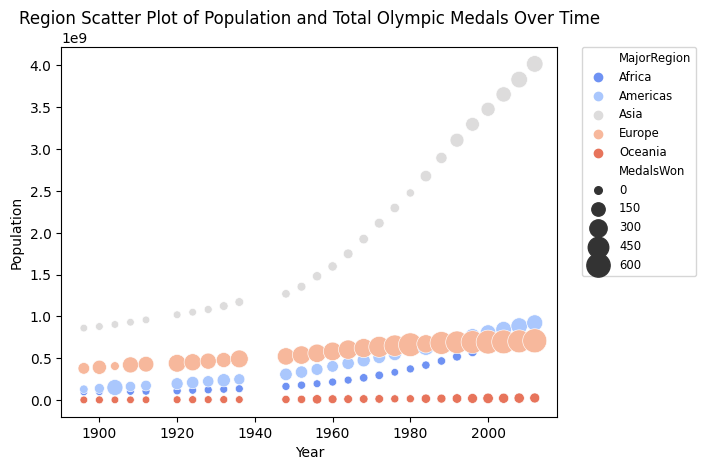

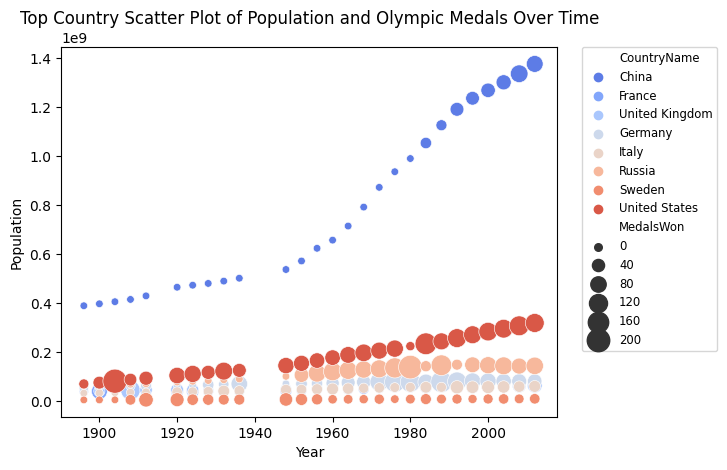

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(30, 10))

vmax_value = 400000000

gdf.plot(ax=ax, column='Population', cmap='OrRd', legend=True, legend_kwds={'label': "Population"}, vmax=vmax_value)
gdf.plot(ax=ax, color='none', edgecolor='black', linewidth=0.01)
ax.set_title('Population by Country')
plt.show()

cluster_data1 = filtered_df.pivot_table(index='CountryName', columns='Year', values='Population', aggfunc='sum')
cluster_data2 = Regions.pivot_table(index='MajorRegion', columns='Year', values='Population', aggfunc='sum')
vmax_value1 = 400000000
vmax_value2 = 800000000
sns.clustermap(cluster_data1, cmap='OrRd', method='average', col_cluster=False, figsize=(10, 5), vmax=vmax_value1)
plt.title('Clustering of Countries based on Population')
plt.show()
sns.clustermap(cluster_data2, cmap='OrRd', method='average', col_cluster=False, figsize=(10, 5), vmax=vmax_value2)
plt.title('Clustering of Regions based on Population')
plt.show()

scatterplot = sns.scatterplot(x='Year', y='Population', hue='MajorRegion', size='MedalsWon', data=Regions, sizes=(30, 300), palette='coolwarm')
plt.title('Region Scatter Plot of Population and Total Olympic Medals Over Time')
plt.xlabel('Year')
scatterplot.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize='small')
plt.show()
scatterplot = sns.scatterplot(x='Year', y='Population', hue='CountryName', size='MedalsWon', data=filtered_df, sizes=(30, 300), palette='coolwarm')
plt.title('Top Country Scatter Plot of Population and Olympic Medals Over Time')
plt.xlabel('Year')
scatterplot.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize='small')
plt.show()

In [ ]:
Regions

,Year,MajorRegion,MedalsWon,GDP,Children,Emissions,Gini,Internet_Users,Life_Expectancy,Population,MedalsWon_Total,pred,PredSum
0,1896,Africa,0,1.444135,6.520962,0.898250,43.415385,0.000000,32.350000,1.000859e+08,351,0.28,402.40
1,1896,Americas,19,2.616674,5.738261,10.467725,43.425000,0.000000,33.764130,1.313966e+08,3778,24.09,3594.25
2,1896,Asia,0,1.636681,6.305379,2.734475,40.563636,0.000000,31.215152,8.612790e+08,1775,2.77,2036.66
3,1896,Europe,96,2.274089,4.787132,49.551975,39.922794,0.000000,41.754412,3.806918e+08,10423,80.27,9886.74
4,1896,Oceania,2,3.881250,3.668750,3.837500,32.462500,0.000000,47.050000,4.225750e+06,586,3.85,533.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,2012,Africa,38,4.990385,4.360962,31.675350,44.419231,12.720952,63.434615,8.485882e+08,351,47.24,402.40
131,2012,Americas,247,3.848304,2.236957,123.304500,45.271739,41.780109,75.403261,9.237595e+08,3778,266.58,3594.25
132,2012,Asia,268,4.513677,2.394091,256.386250,38.788636,40.715530,73.191667,4.012962e+09,1775,323.43,2036.66
133,2012,Europe,646,1.185325,1.594412,253.690000,38.315441,72.180147,78.480882,7.097365e+08,10423,602.14,9886.74


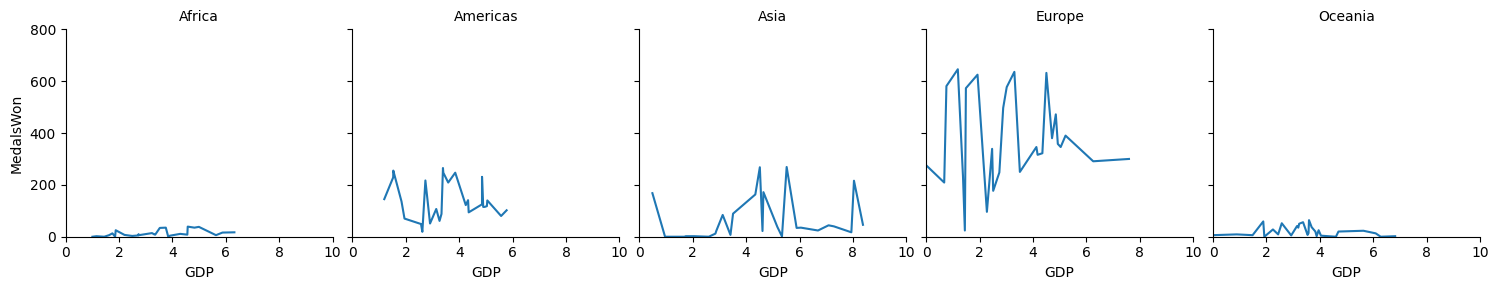

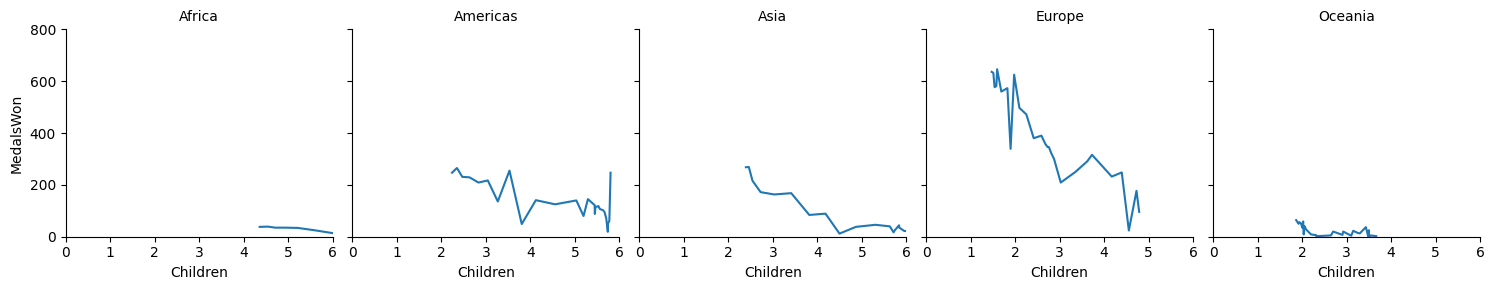

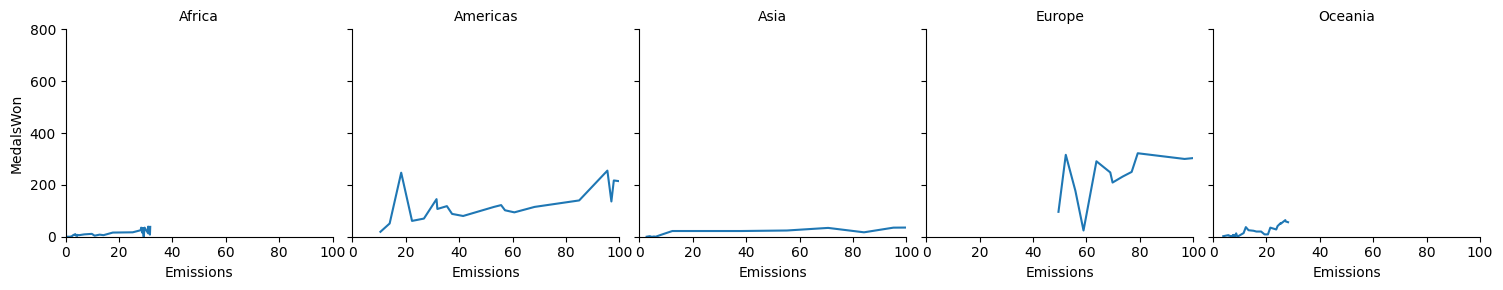

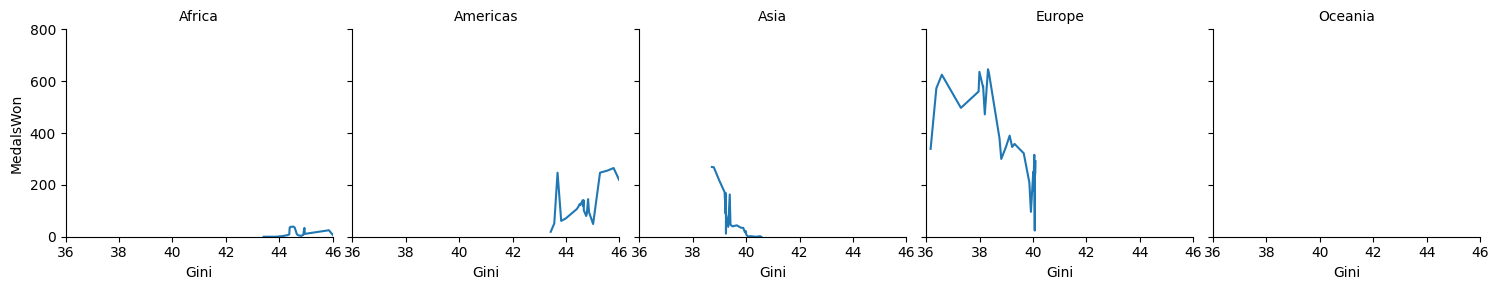

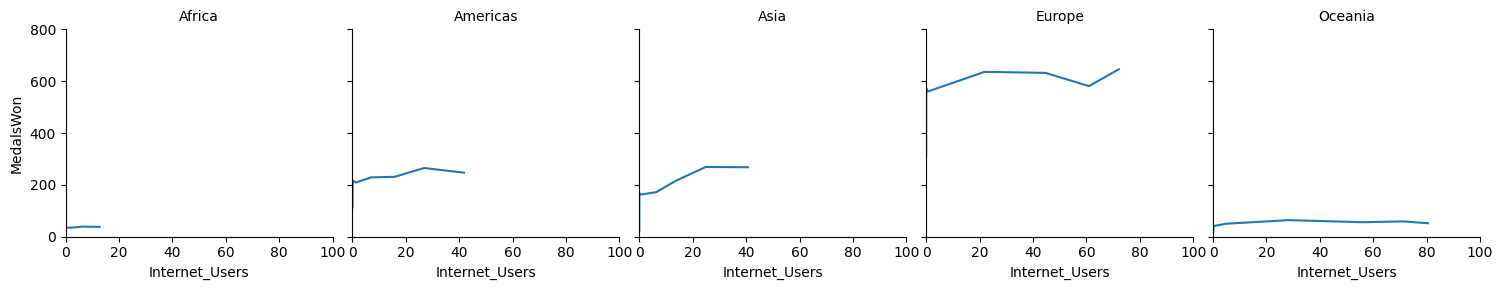

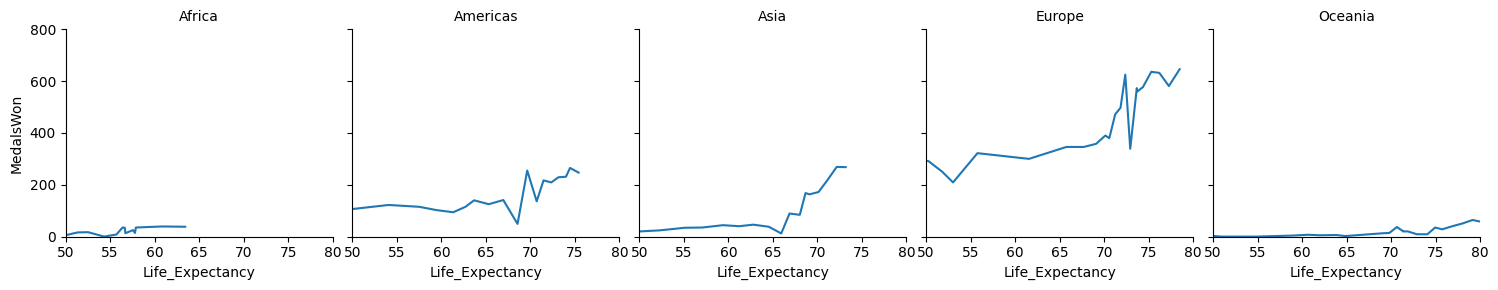

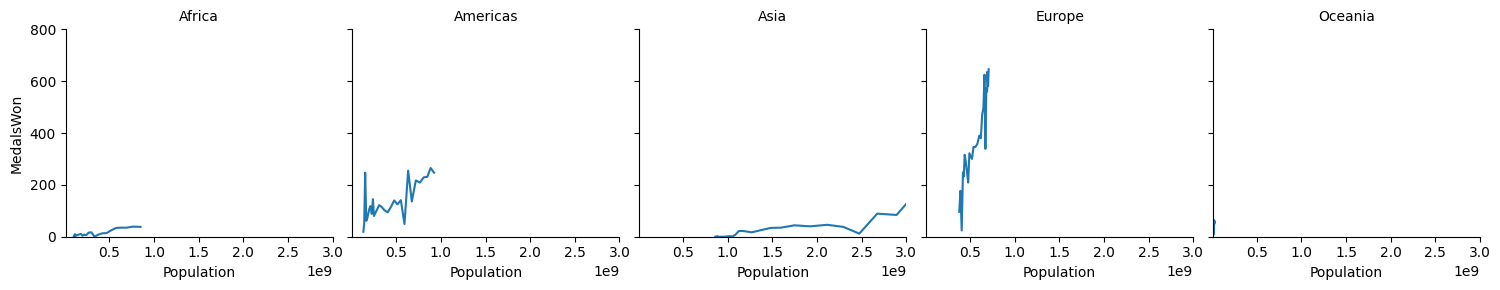

In [ ]:
g = sns.FacetGrid(Regions, col="MajorRegion", col_wrap=5, height=3)
g.map(sns.lineplot, "GDP", "MedalsWon")
g.set_axis_labels("GDP", "MedalsWon")
g.set_titles(col_template="{col_name}")
plt.xlim(0, 10)
plt.ylim(0, 800)
plt.show()
g = sns.FacetGrid(Regions, col="MajorRegion", col_wrap=5, height=3)
g.map(sns.lineplot, "Children", "MedalsWon")
g.set_axis_labels("Children", "MedalsWon")
g.set_titles(col_template="{col_name}")
plt.xlim(0, 6)
plt.ylim(0, 800)
plt.show()
g = sns.FacetGrid(Regions, col="MajorRegion", col_wrap=5, height=3)
g.map(sns.lineplot, "Emissions", "MedalsWon")
g.set_axis_labels("Emissions", "MedalsWon")
g.set_titles(col_template="{col_name}")
plt.xlim(0, 100)
plt.ylim(0, 800)
plt.show()
g = sns.FacetGrid(Regions, col="MajorRegion", col_wrap=5, height=3)
g.map(sns.lineplot, "Gini", "MedalsWon")
g.set_axis_labels("Gini", "MedalsWon")
g.set_titles(col_template="{col_name}")
plt.xlim(36, 46)
plt.ylim(0, 800)
plt.show()
g = sns.FacetGrid(Regions, col="MajorRegion", col_wrap=5, height=3)
g.map(sns.lineplot, "Internet_Users", "MedalsWon")
g.set_axis_labels("Internet_Users", "MedalsWon")
g.set_titles(col_template="{col_name}")
plt.xlim(0, 100)
plt.ylim(0, 800)
plt.show()
g = sns.FacetGrid(Regions, col="MajorRegion", col_wrap=5, height=3)
g.map(sns.lineplot, "Life_Expectancy", "MedalsWon")
g.set_axis_labels("Life_Expectancy", "MedalsWon")
g.set_titles(col_template="{col_name}")
plt.xlim(50, 80)
plt.ylim(0, 800)
plt.show()
g = sns.FacetGrid(Regions, col="MajorRegion", col_wrap=5, height=3)
g.map(sns.lineplot, "Population", "MedalsWon")
g.set_axis_labels("Population", "MedalsWon")
g.set_titles(col_template="{col_name}")
plt.xlim(10000000, 3000000000)
plt.ylim(0, 800)
plt.show()